In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

%matplotlib inline

## Lectura del CSV

In [2]:
data = pd.read_csv('data.csv')

data

Age Number of sexual partners First sexual intercourse  \
0     18                       4.0                     15.0   
1     15                       1.0                     14.0   
2     34                       1.0                        ?   
3     52                       5.0                     16.0   
4     46                       3.0                     21.0   
..   ...                       ...                      ...   
853   34                       3.0                     18.0   
854   32                       2.0                     19.0   
855   25                       2.0                     17.0   
856   33                       2.0                     24.0   
857   29                       2.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
0                  1.0    0.0            0.0                 0.0   
1                  1.0    0.0            0.0                 0.0   
2                  1.0    0.0            0.0                 0.0   
3                  4.0    1.0           37.0                37.0   
4                  4.0    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
853                0.0    0.0            0.0                 0.0   
854                1.0    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   
856                2.0    0.0            0.0                 0.0   
857                1.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
0                       0.0                             0.0  0.0  ...   
1                       0.0                             0.0  0.0  ...   
2                       0.0                             0.0  0.0  ...   
3                       1.0                             3.0  0.0  ...   
4                       1.0                            15.0  0.0  ...   
..                      ...                             ...  ...  ...   
853                     0.0                             0.0  0.0  ...   
854                     1.0                             8.0  0.0  ...   
855                     1.0                            0.08  0.0  ...   
856                     1.0                            0.08  0.0  ...   
857                     1.0                             0.5  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
0                                  ?                               ?   
1                                  ?                               ?   
2                                  ?                               ?   
3                                  ?                               ?   
4                                  ?                               ?   
..                               ...                             ...   
853                                ?                               ?   
854                                ?                               ?   
855                                ?                               ?   
856                                ?                               ?   
857                                ?                               ?   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
0           0      0      0  0          0        0        0      0  
1           0      0      0  0          0        0        0      0  
2           0      0      0  0          0        0        0      0  
3           1      0      1  0          0        0        0      0  
4           0      0      0  0          0        0        0      0  
..        ...    ...    ... ..        ...      ...      ...    ...  
853         0      0      0  0          0        0        0      0  
854         0      0      0  0          0        0        0      0  
855         0      0      0  0          0        0        1      0  

In [3]:
count_question_marks_per_column = data.map(lambda x: x == '?').sum()

print("Columnas con mas de 50 valores nulos")

for column, value in count_question_marks_per_column.items():
    if value < 50:
        print(f"{column}: {value}")

# print(count_question_marks_per_column)

Columnas con mas de 50 valores nulos
Age: 0
Number of sexual partners: 26
First sexual intercourse: 7
Smokes: 13
Smokes (years): 13
Smokes (packs/year): 13
STDs: Number of diagnosis: 0
Dx:Cancer: 0
Dx:CIN: 0
Dx:HPV: 0
Dx: 0
Hinselmann: 0
Schiller: 0
Citology: 0
Biopsy: 0


In [4]:
print("Columnas con mas de 450 valores nulos")

for column, value in count_question_marks_per_column.items():
    if value > 450:
        print(f"{column}: {value}")

Columnas con mas de 450 valores nulos
STDs: Time since first diagnosis: 787
STDs: Time since last diagnosis: 787


In [5]:
# Count missing values in each column
missing_values_count = data.isna().sum()

print(missing_values_count)

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [6]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Count missing values in each column
missing_values_count = data.isna().sum()

print(missing_values_count)

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

## Generación del análisis exploratorio

In [7]:
profile = ProfileReport(data, title="Exploración de datos")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Selección de variables numéricas, basándonos en la clasificación de cuantitativas y cualitativas

También reemplazamos todos los valores ? con un 0 para tener solo valores numéricos

In [8]:
numerical = data[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']]

for column in numerical.columns:
    numerical[column] = pd.to_numeric(numerical[column].replace('?', np.nan), errors='coerce')

# Rellenar NaN con la media de cada columna
for column in numerical:
    if column != 'STDs: Time since first diagnosis' and column != 'STDs: Time since last diagnosis':
        numerical[column] = numerical[column].fillna(numerical[column].mean())
    else:
        # Para estas columnas, si deseas reemplazar '?' por '0', primero asegúrate de que sean NaN
        numerical[column] = numerical[column].fillna(0).astype(int)

numerical = numerical.astype("float")
numerical

/tmp/ipykernel_93450/2460247486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[column] = pd.to_numeric(numerical[column].replace('?', np.nan), errors='coerce')
/tmp/ipykernel_93450/2460247486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[column] = numerical[column].fillna(numerical[column].mean())
/tmp/ipykernel_93450/2460247486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Age  Number of sexual partners  First sexual intercourse  \
0    18.0                        4.0                   15.0000   
1    15.0                        1.0                   14.0000   
2    34.0                        1.0                   16.9953   
3    52.0                        5.0                   16.0000   
4    46.0                        3.0                   21.0000   
..    ...                        ...                       ...   
853  34.0                        3.0                   18.0000   
854  32.0                        2.0                   19.0000   
855  25.0                        2.0                   17.0000   
856  33.0                        2.0                   24.0000   
857  29.0                        2.0                   20.0000   

     Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
0                   1.0             0.0                  0.0   
1                   1.0             0.0                  0.0   
2                   1.0             0.0                  0.0   
3                   4.0            37.0                 37.0   
4                   4.0             0.0                  0.0   
..                  ...             ...                  ...   
853                 0.0             0.0                  0.0   
854                 1.0             0.0                  0.0   
855                 0.0             0.0                  0.0   
856                 2.0             0.0                  0.0   
857                 1.0             0.0                  0.0   

     Hormonal Contraceptives (years)  IUD (years)  STDs (number)  \
0                               0.00          0.0            0.0   
1                               0.00          0.0            0.0   
2                               0.00          0.0            0.0   
3                               3.00          0.0            0.0   
4                              15.00          0.0            0.0   
..                               ...          ...            ...   
853                             0.00          0.0            0.0   
854                             8.00          0.0            0.0   
855                             0.08          0.0            0.0   
856                             0.08          0.0            0.0   
857                             0.50          0.0            0.0   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   
..                         ...                               ...   
853                        0.0                               0.0   
854                        0.0                               0.0   
855                        0.0                               0.0   
856                        0.0                               0.0   
857                        0.0                               0.0   

     STDs: Time since last diagnosis  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  
..                               ...  
853                              0.0  
854                              0.0  
855                              0.0  
856                              0.0  
857                              0.0  

[858 rows x 12 columns]

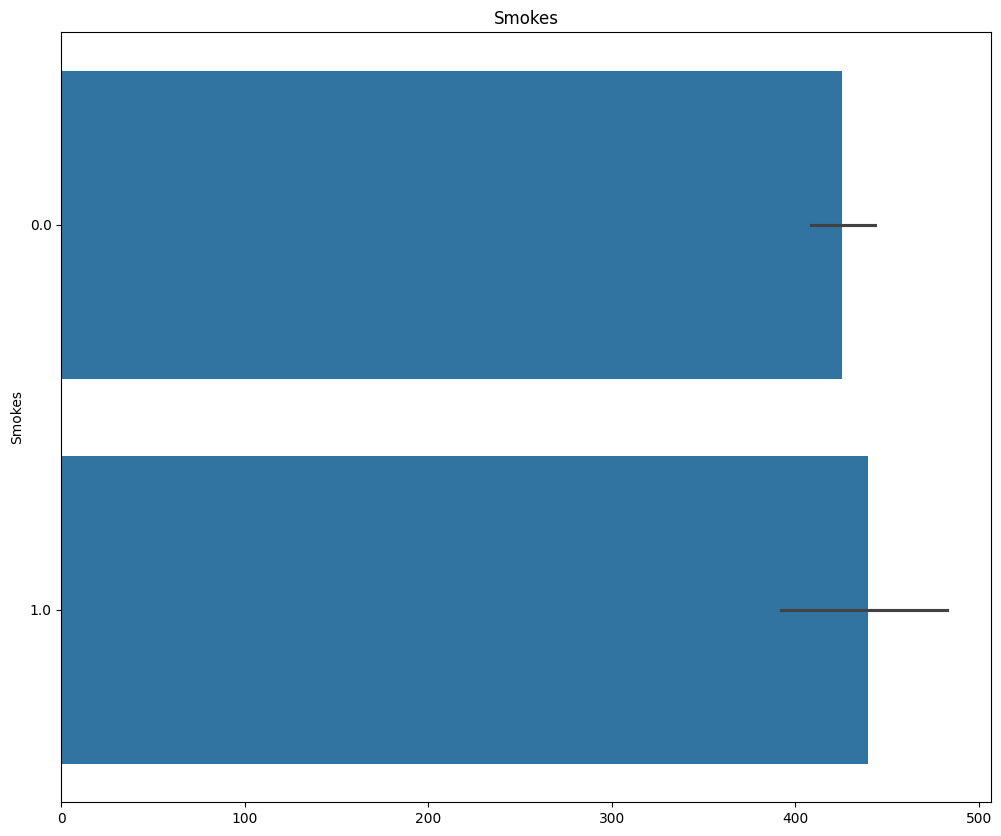

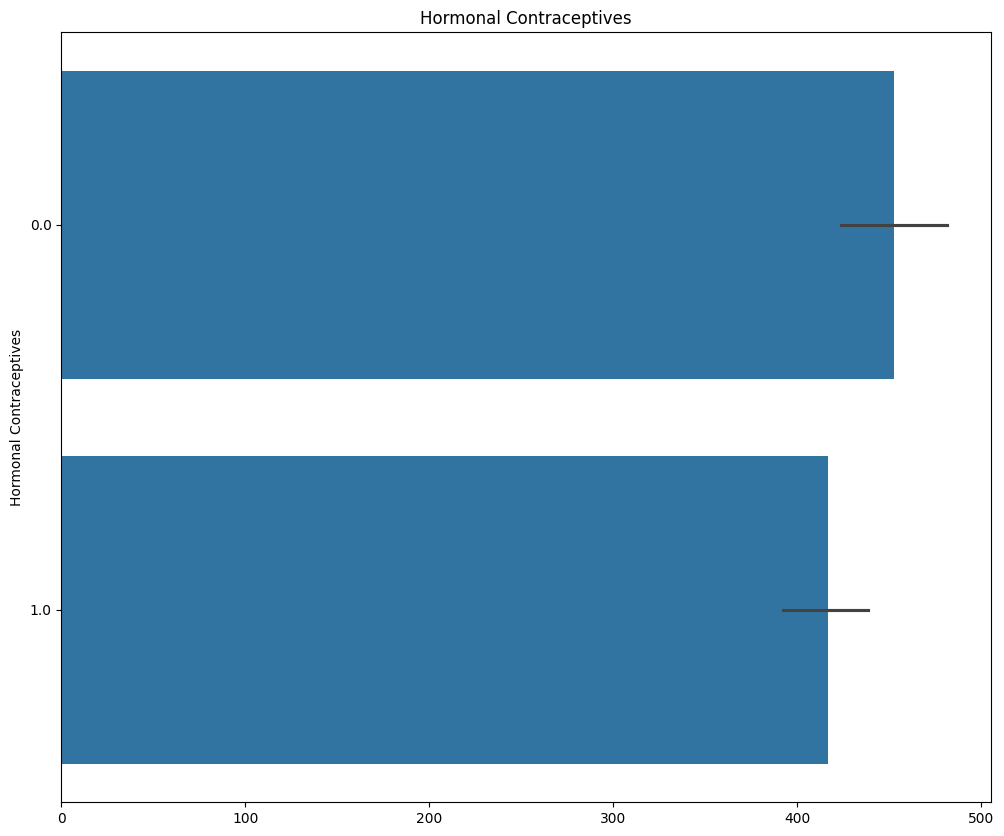

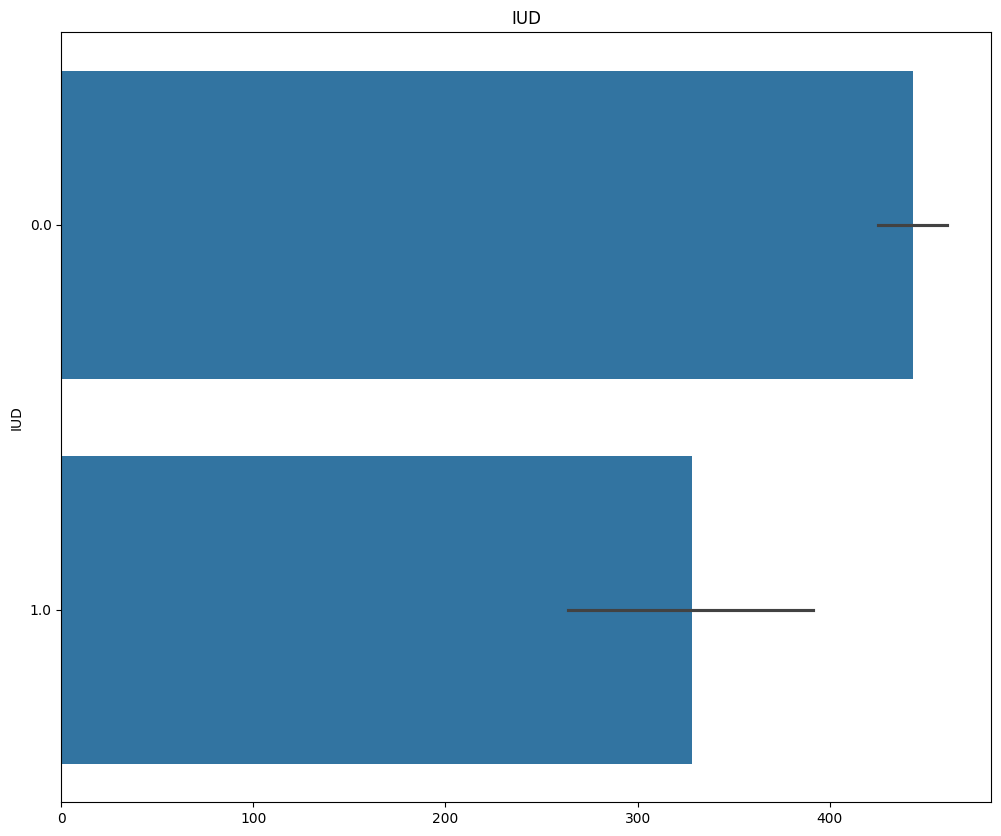

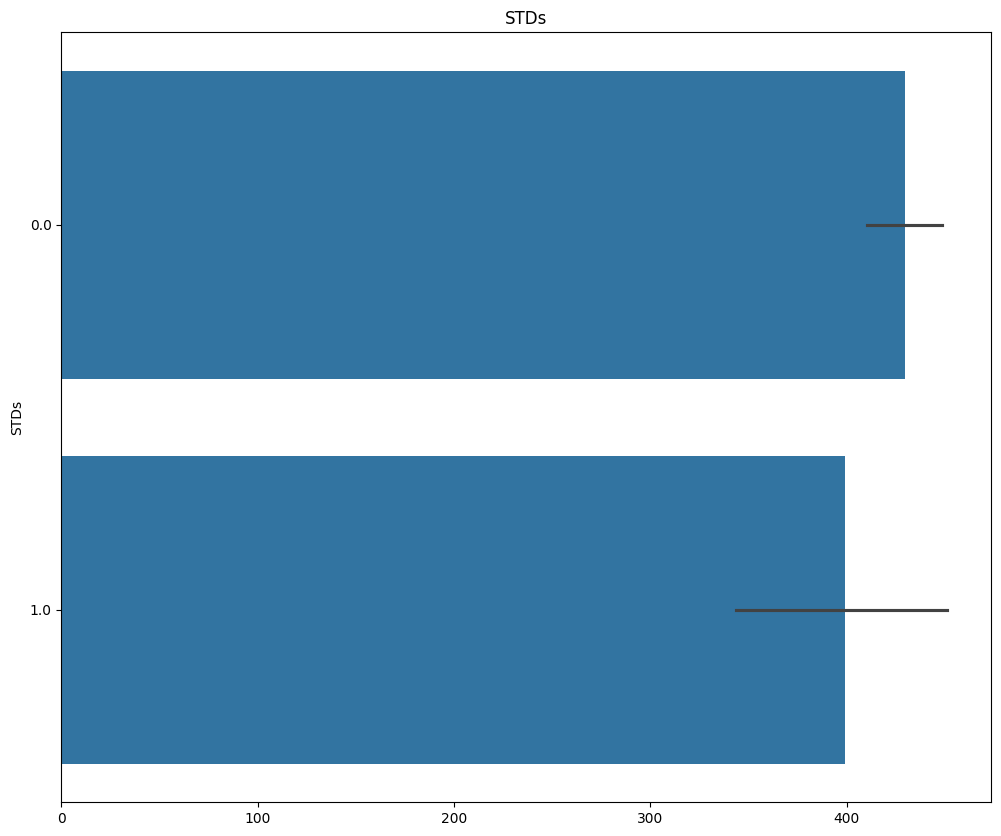

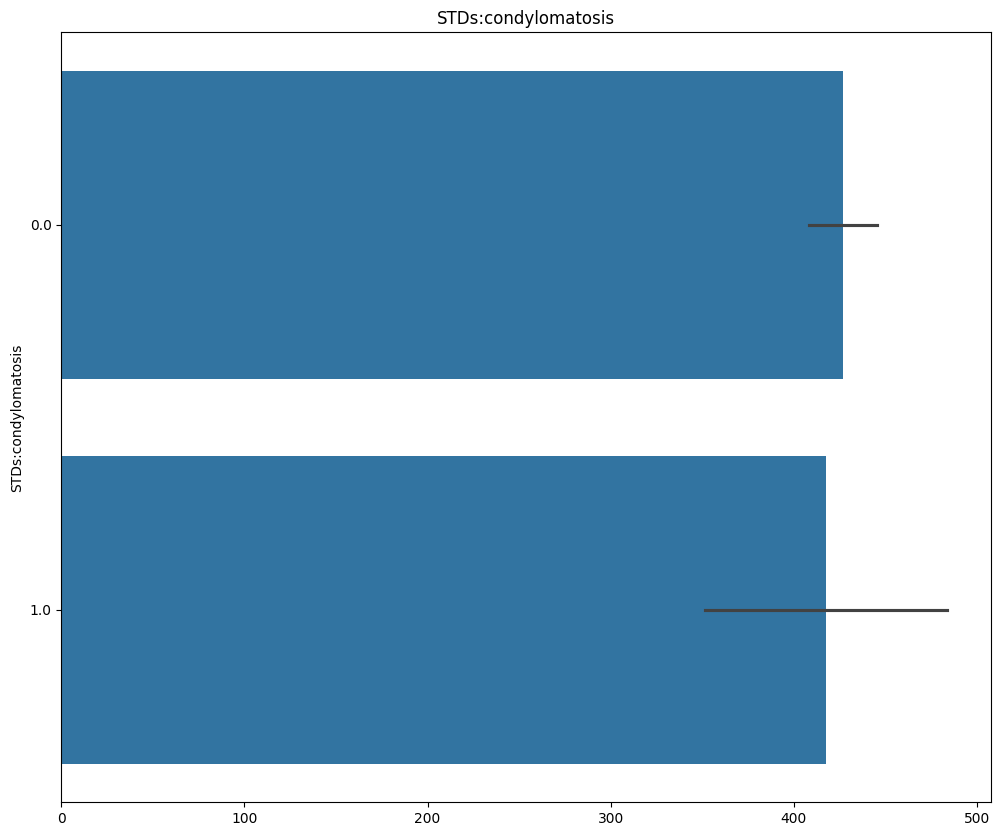

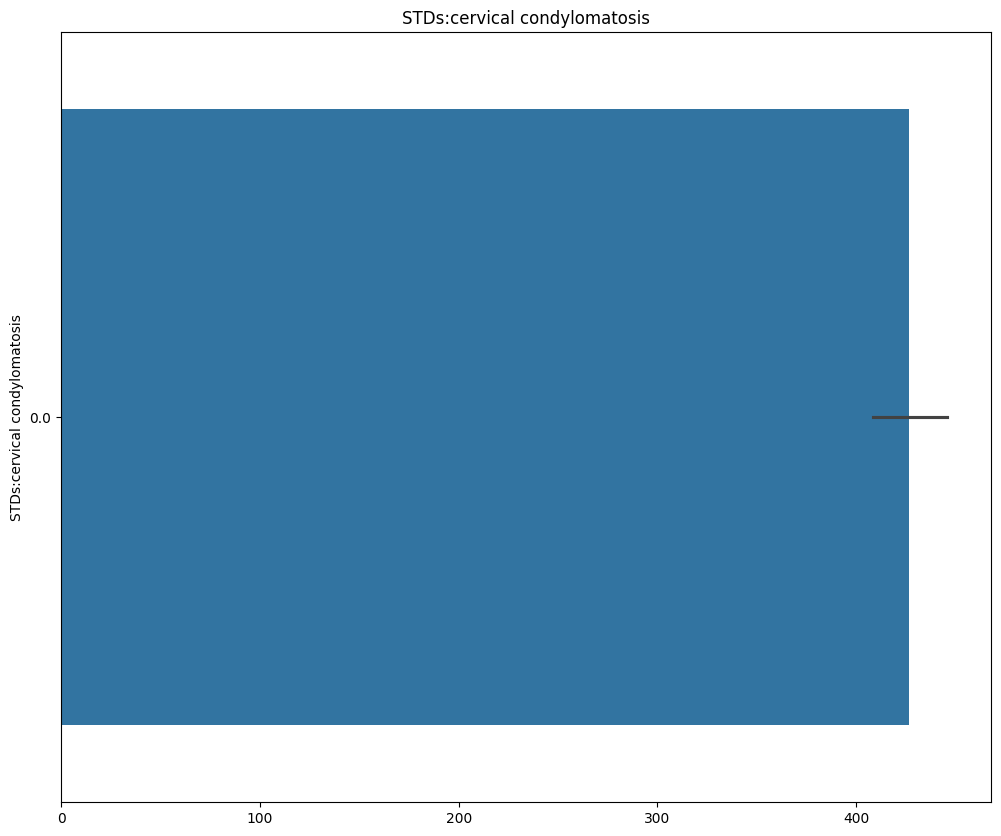

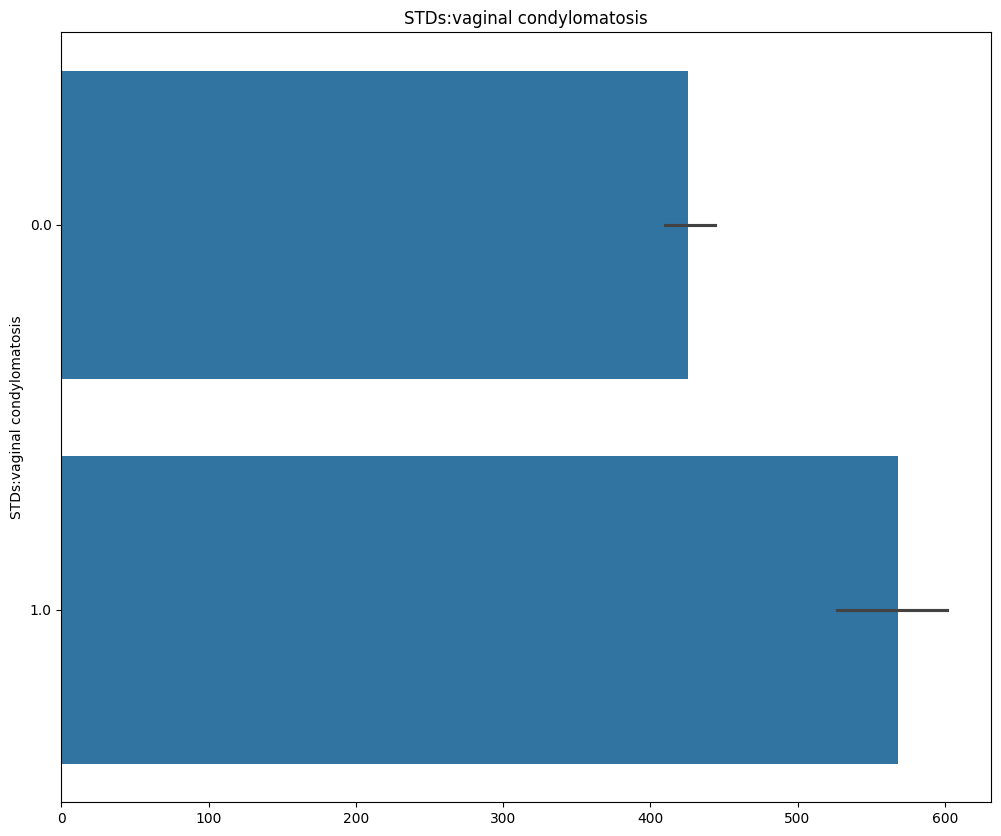

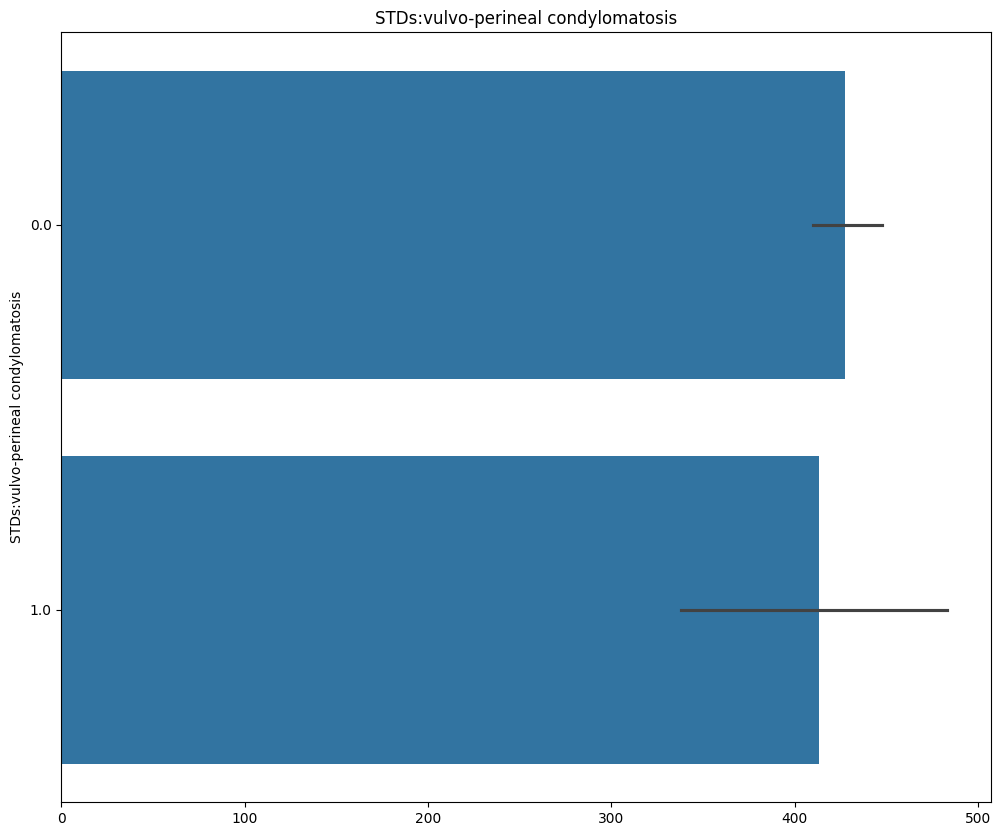

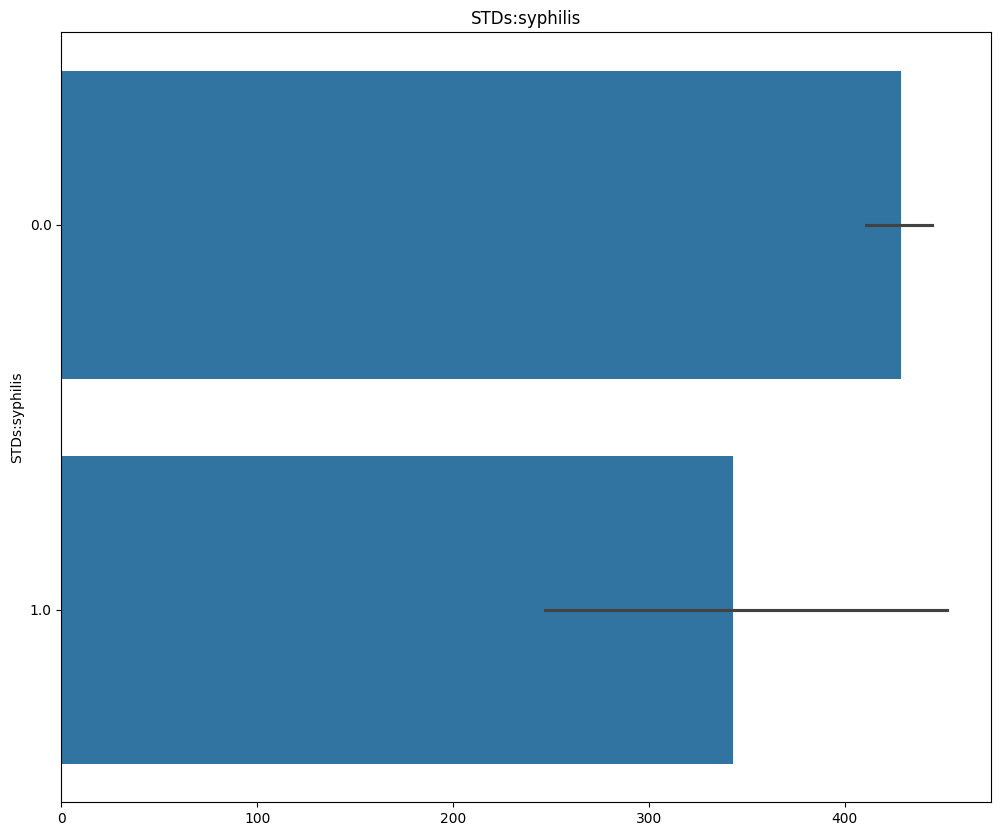

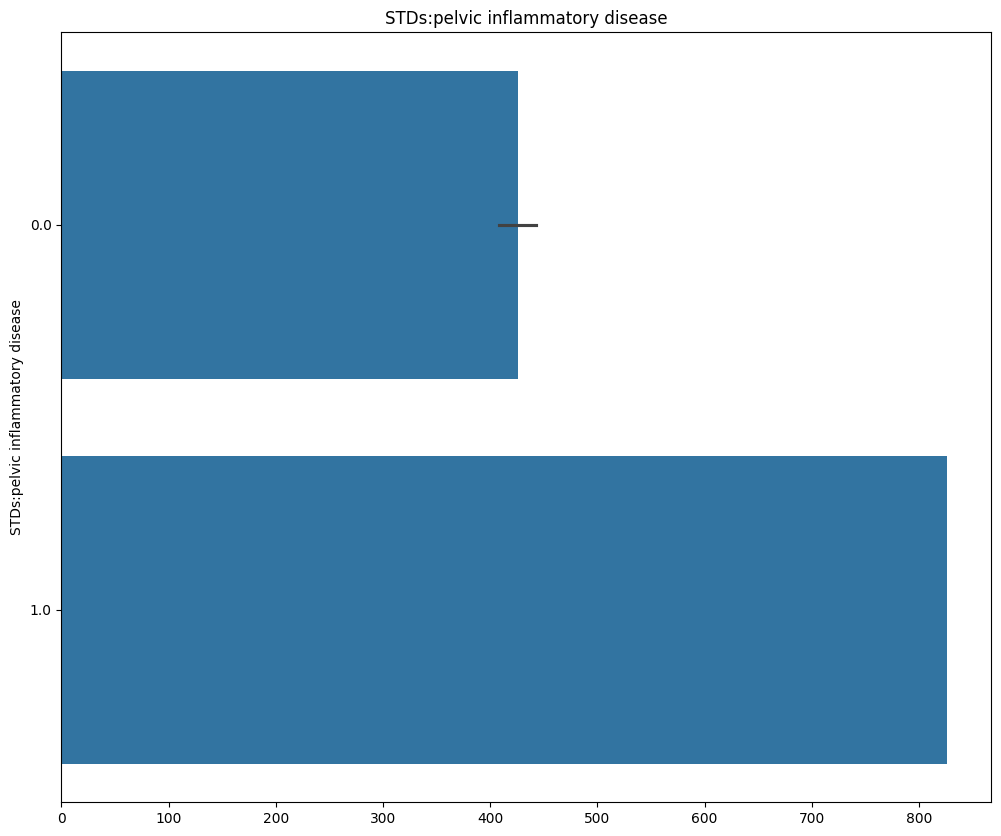

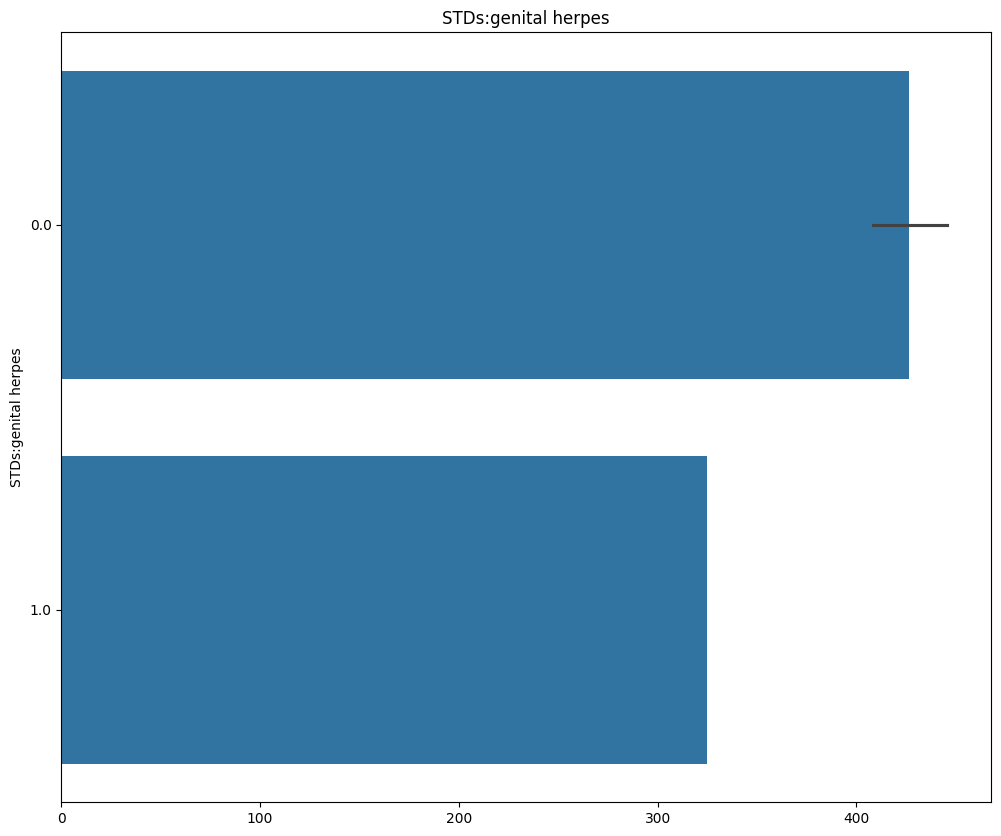

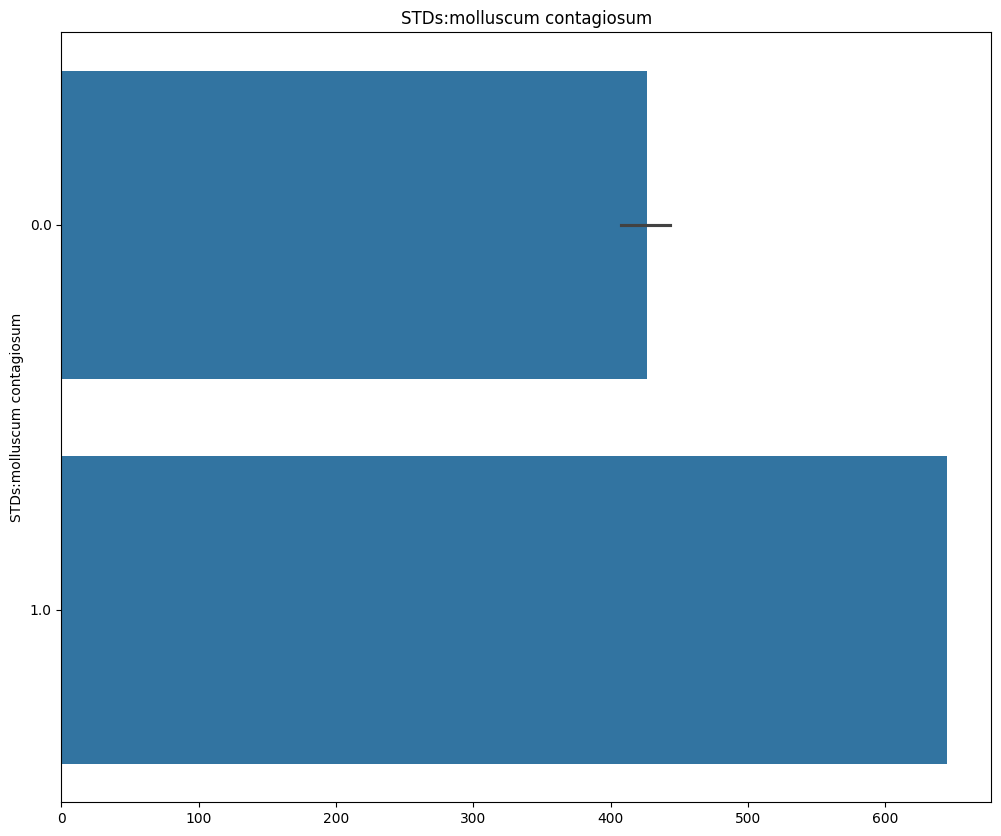

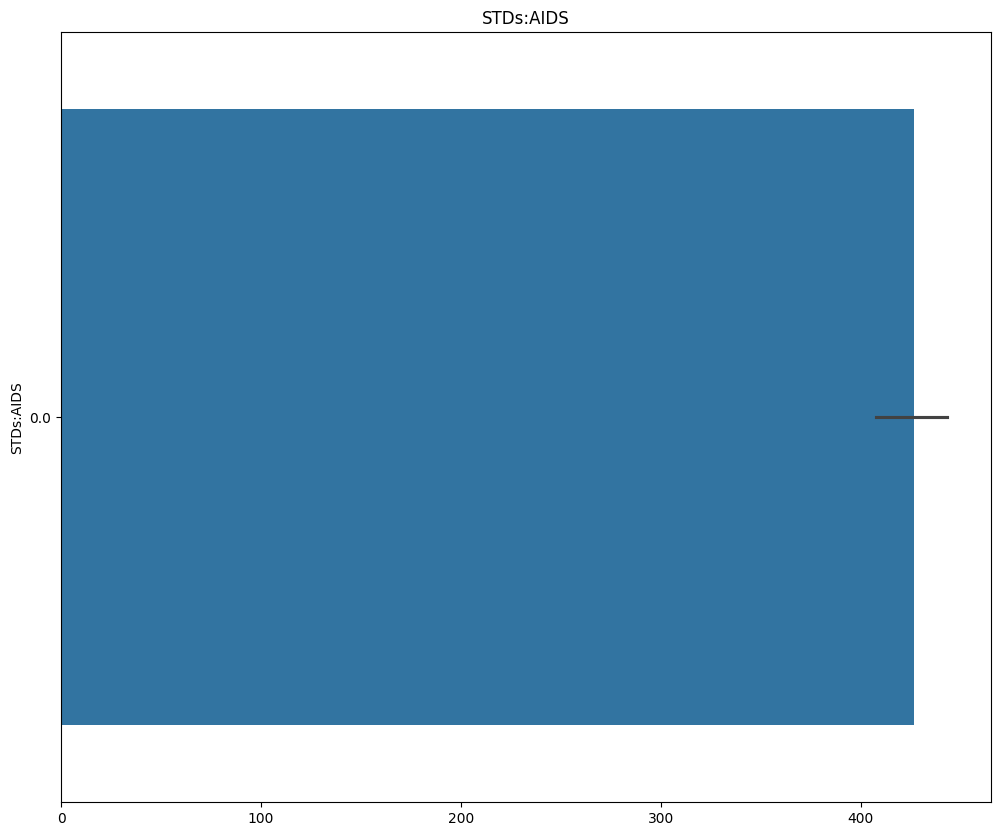

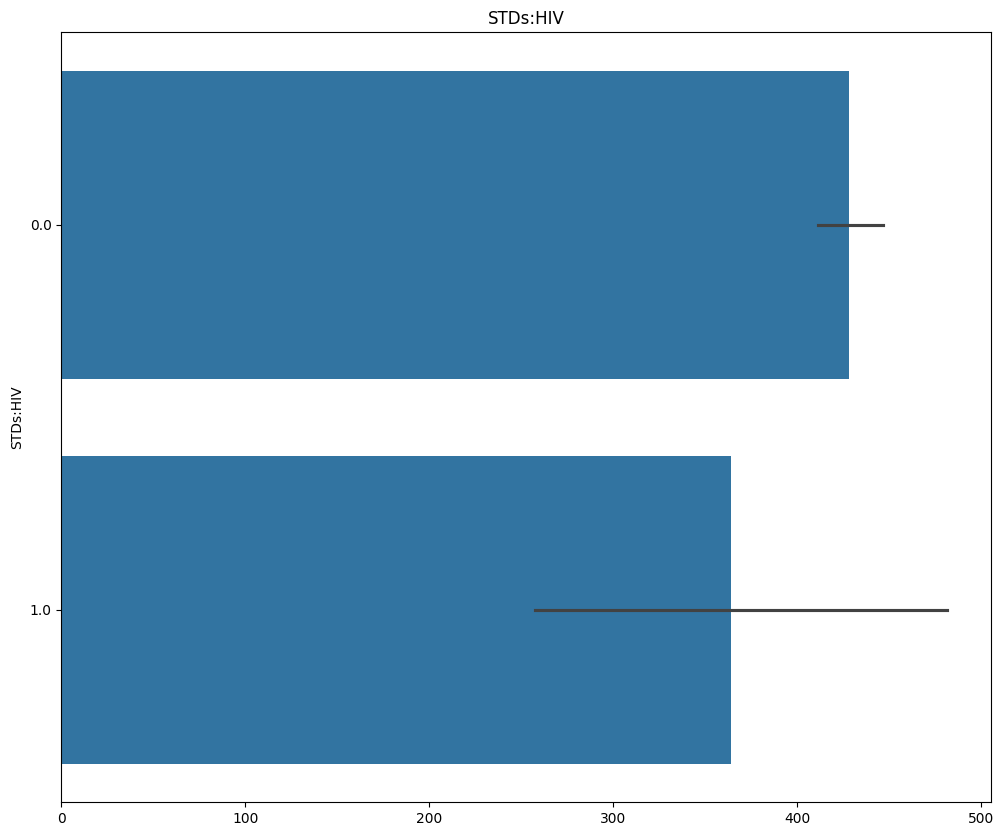

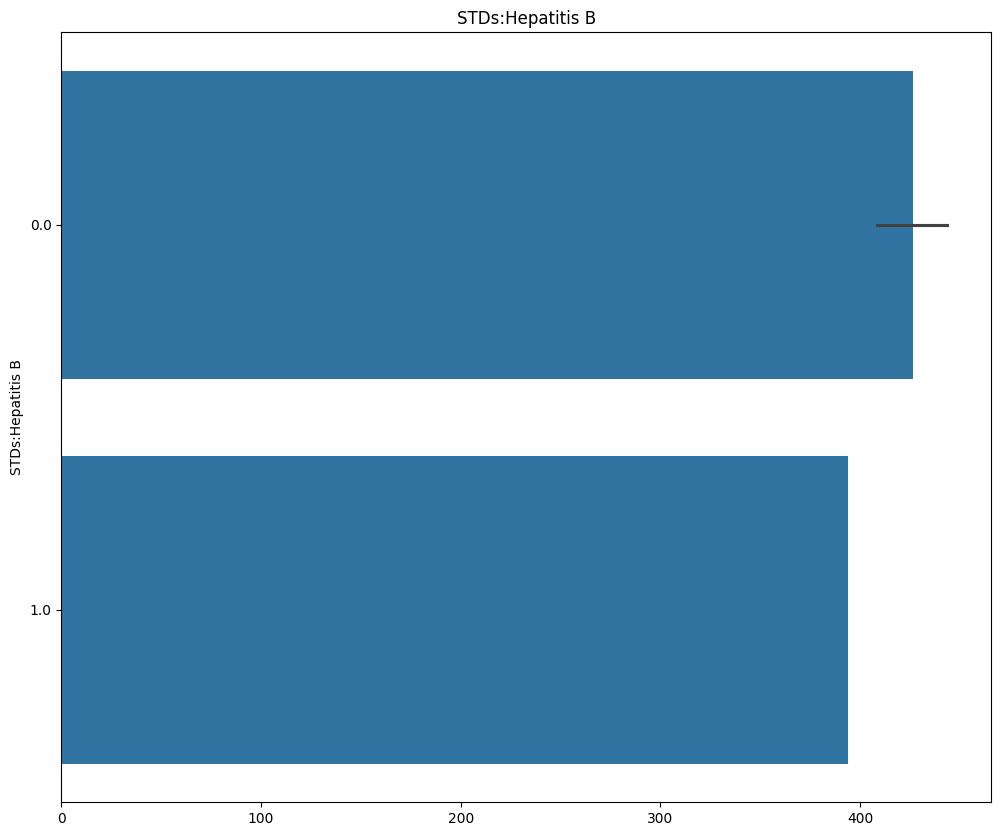

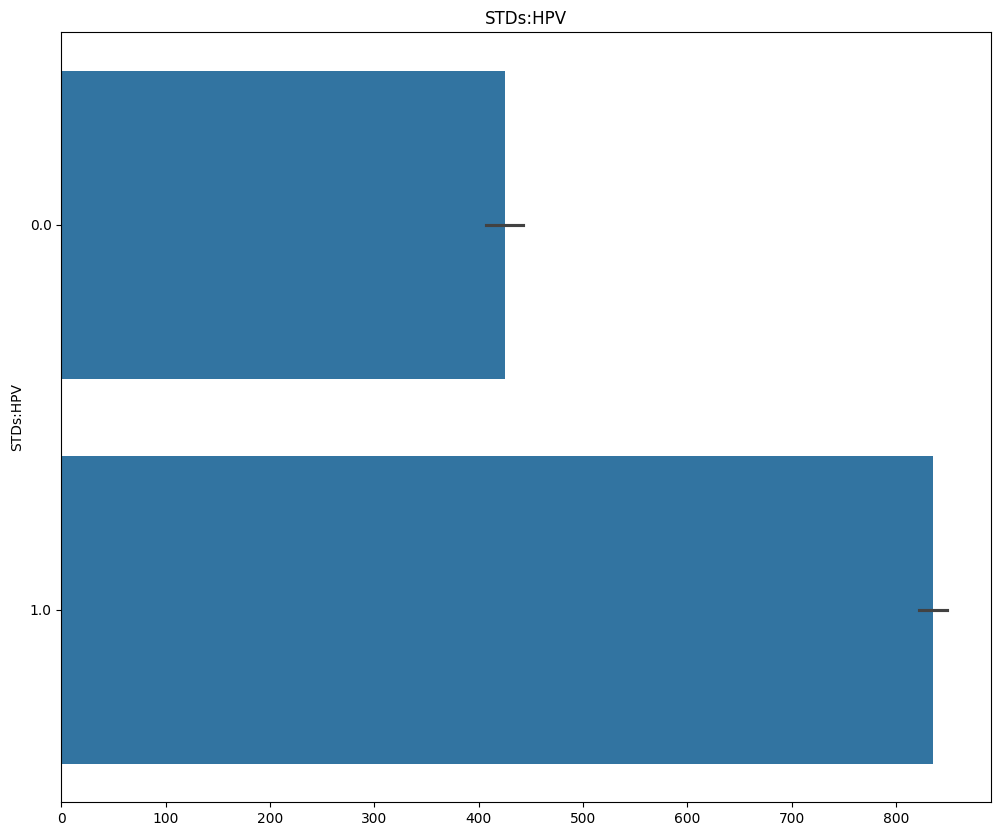

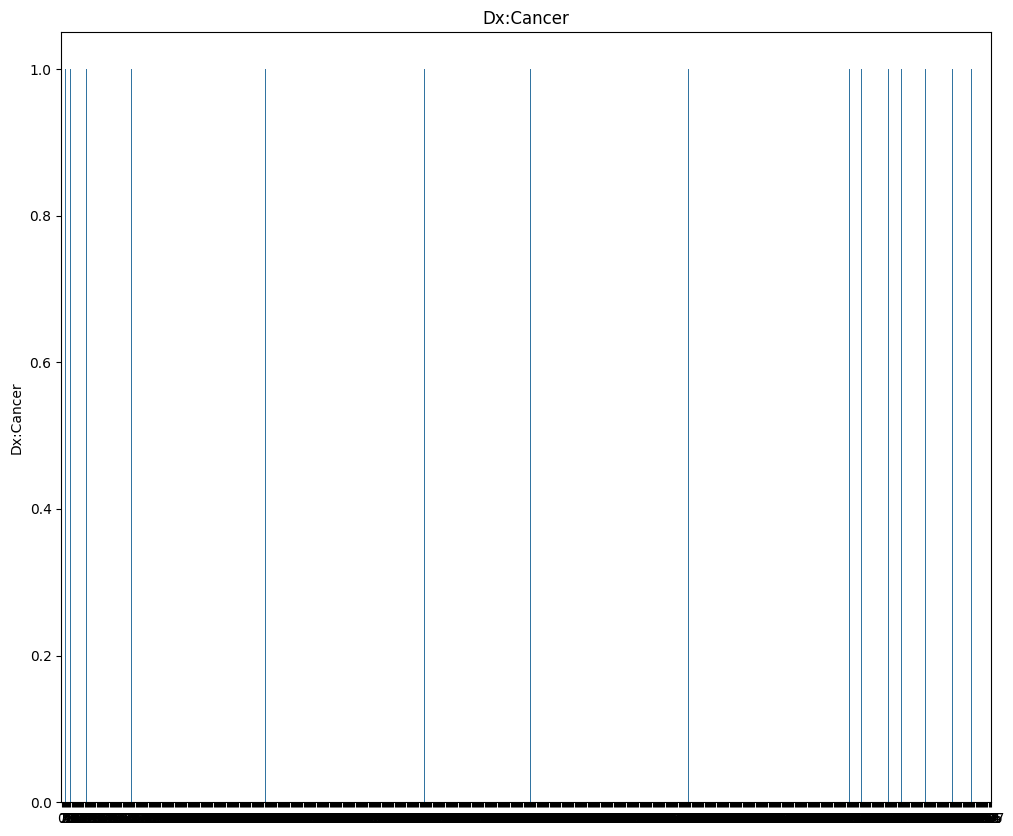

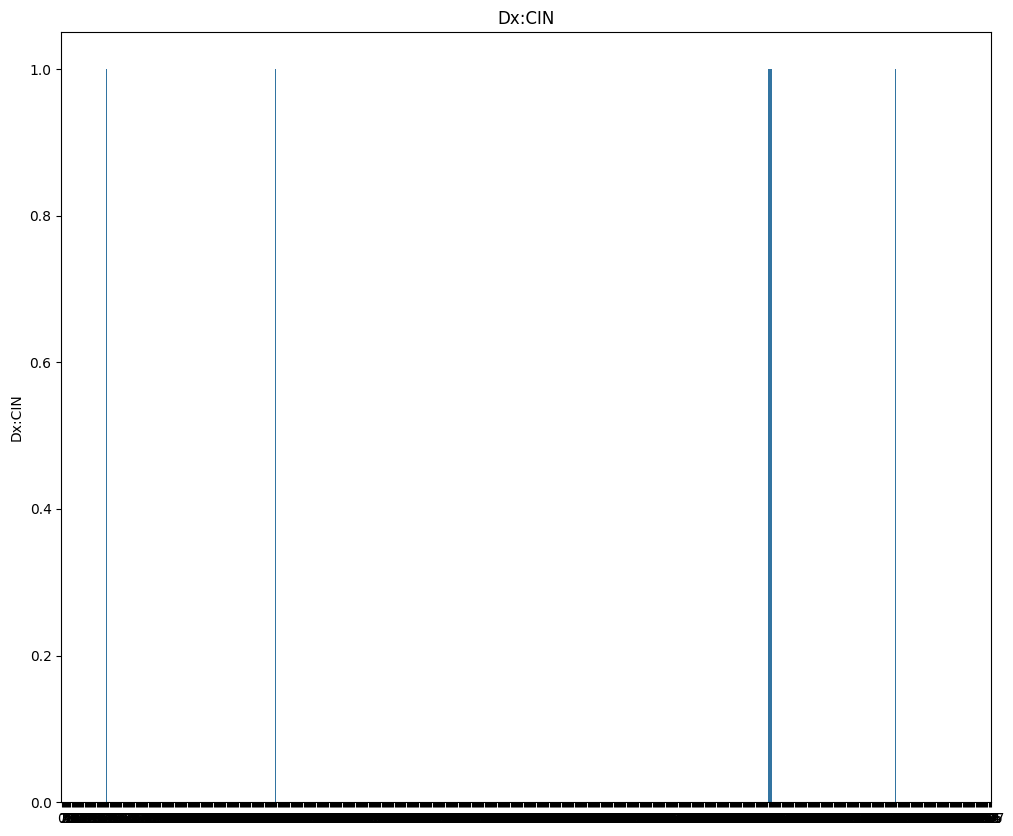

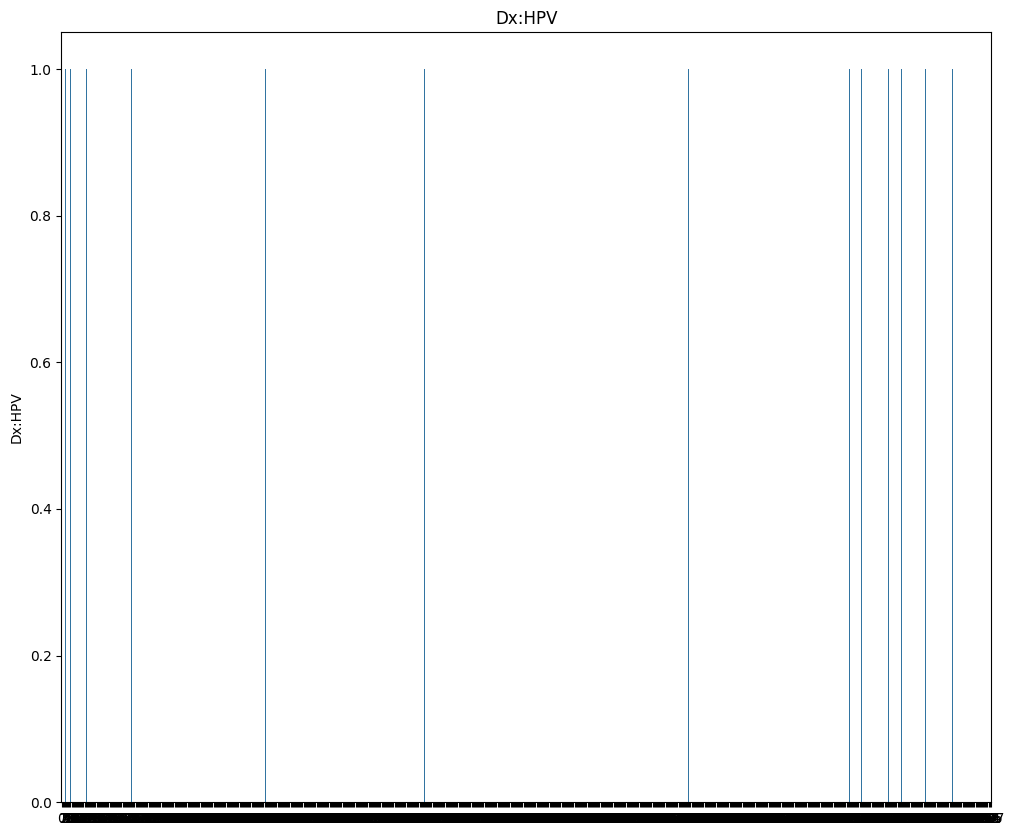

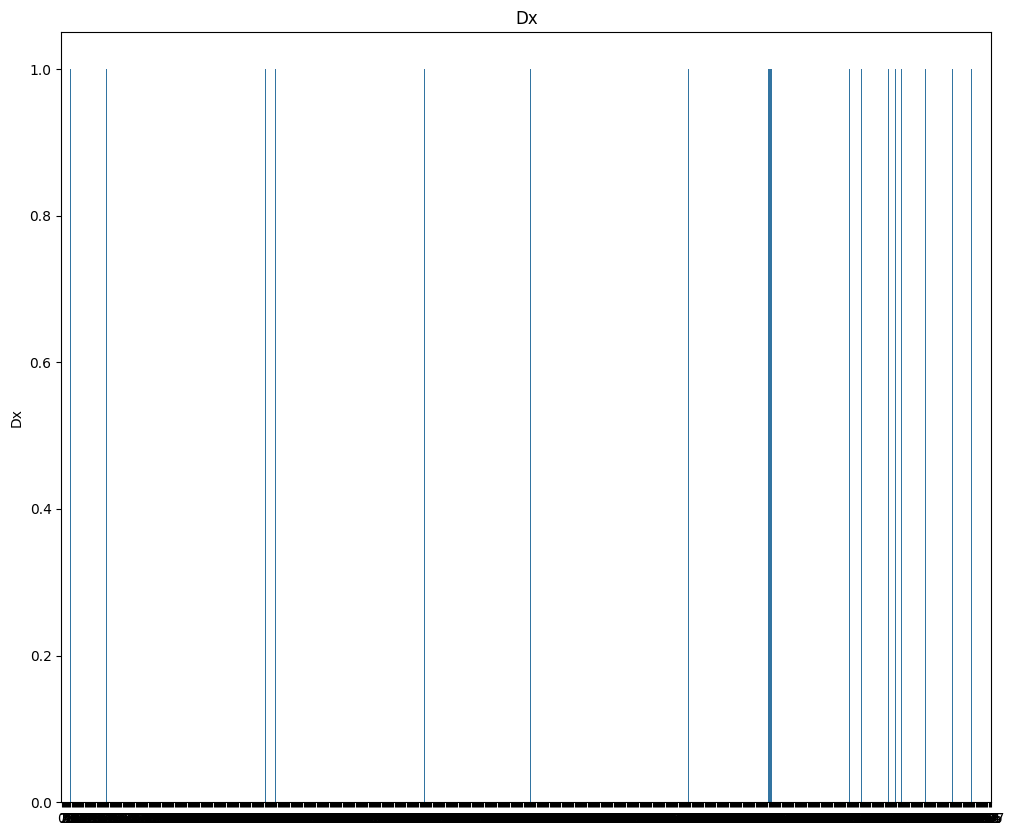

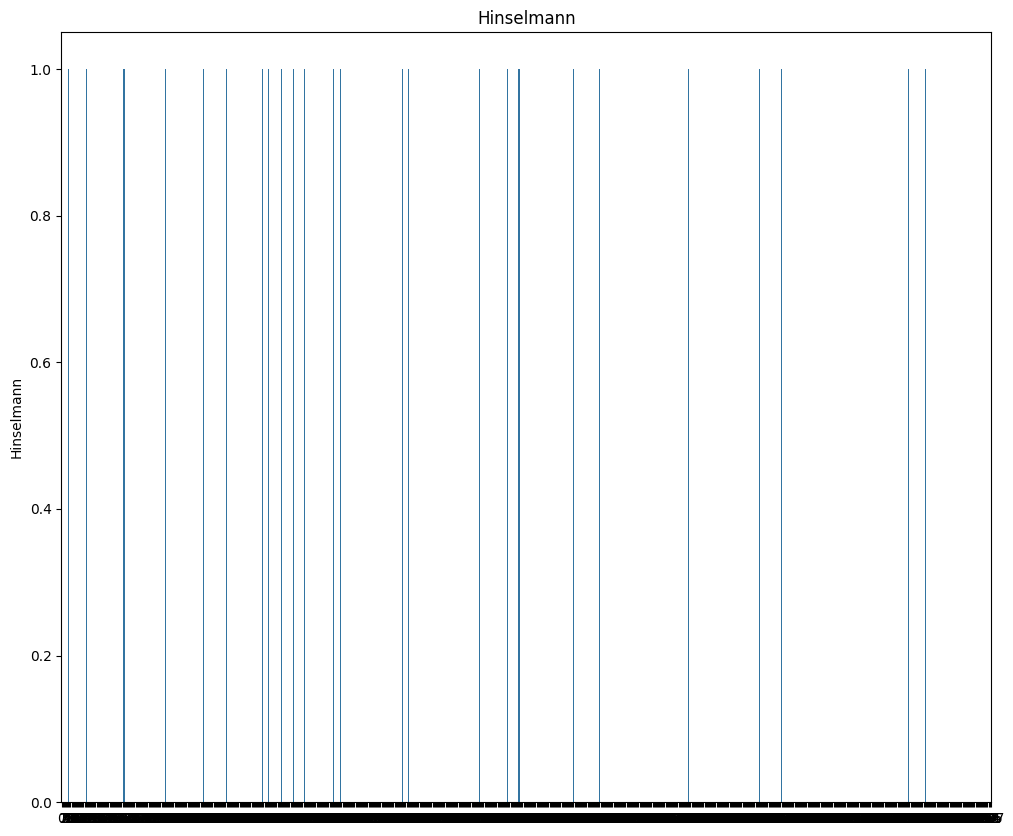

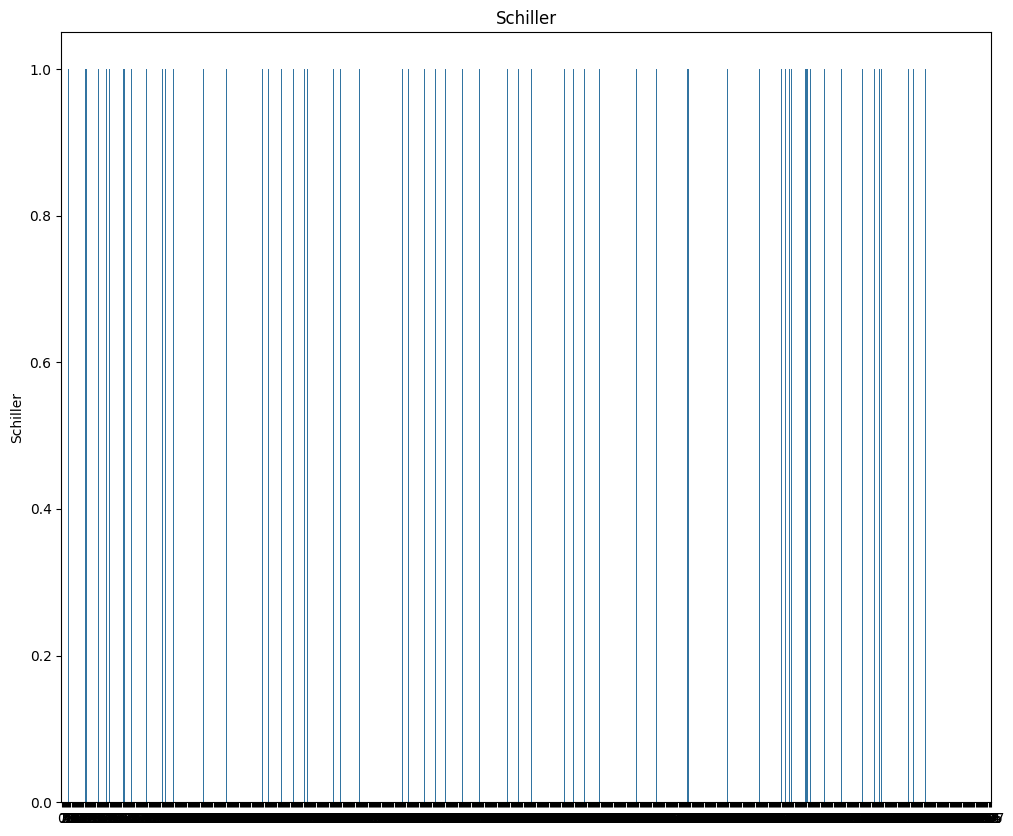

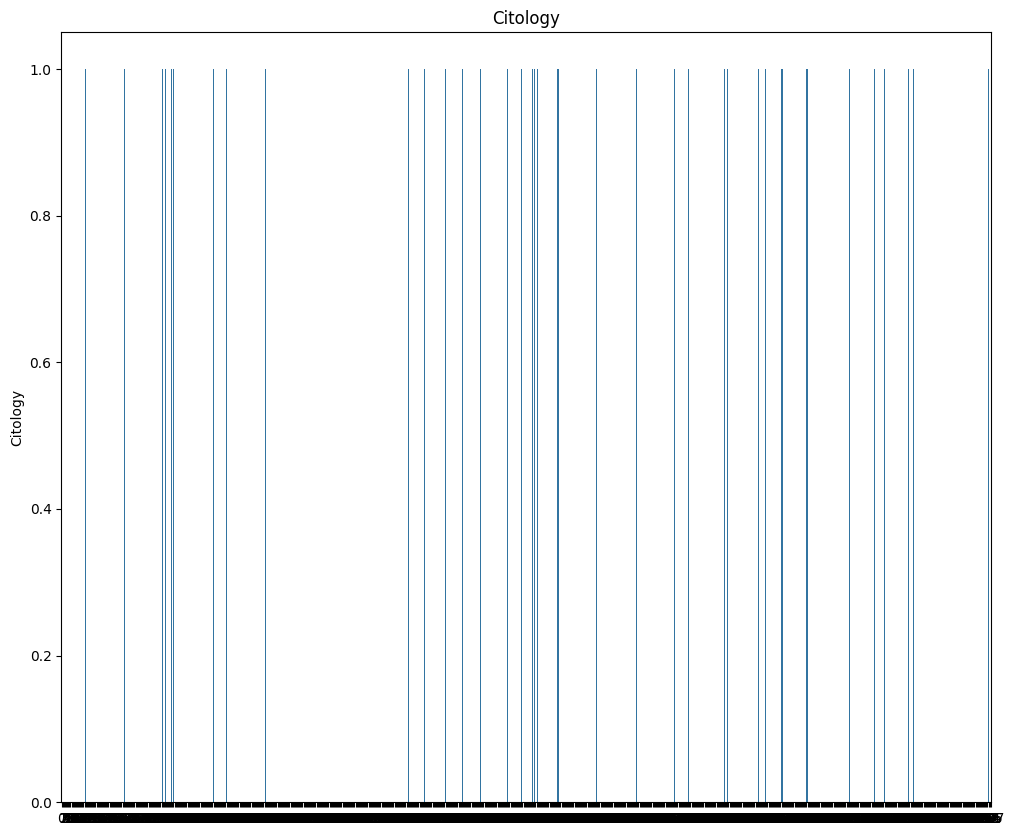

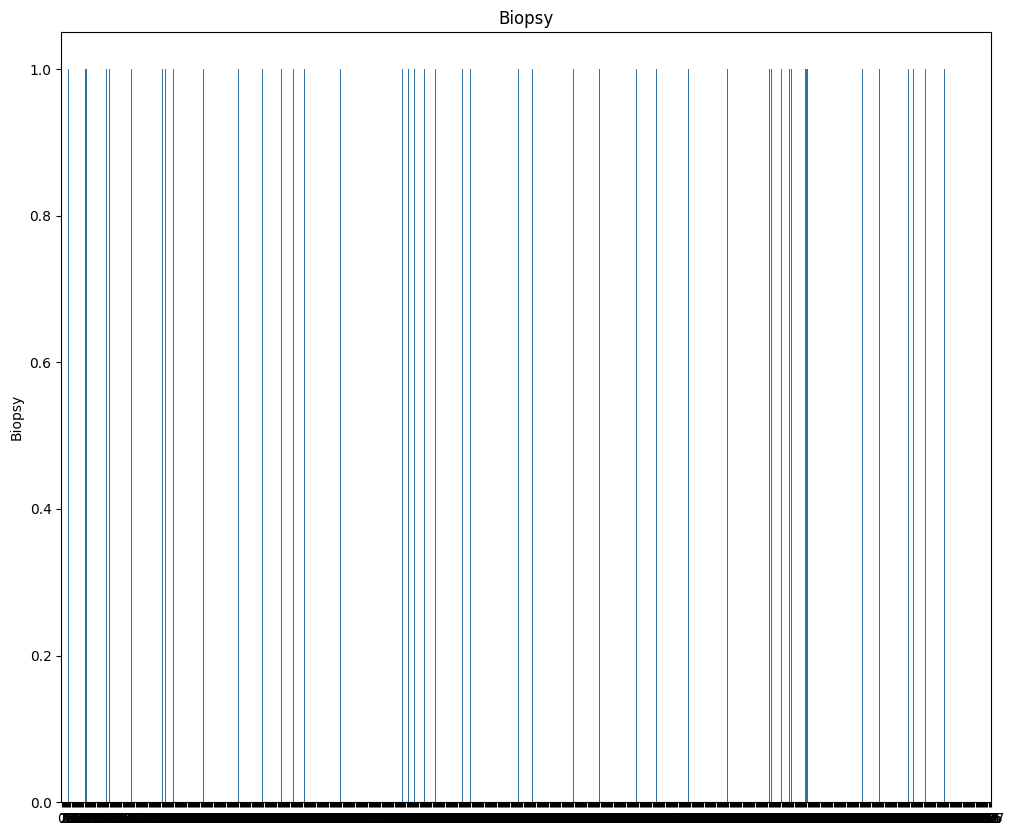

In [9]:
categorical = data[[col for col in data.columns if col not in numerical.columns]]
for column in categorical:
    plt.figure(figsize=(12,10))
    sb.barplot(data=categorical[column])
    plt.title(column)
    plt.show()


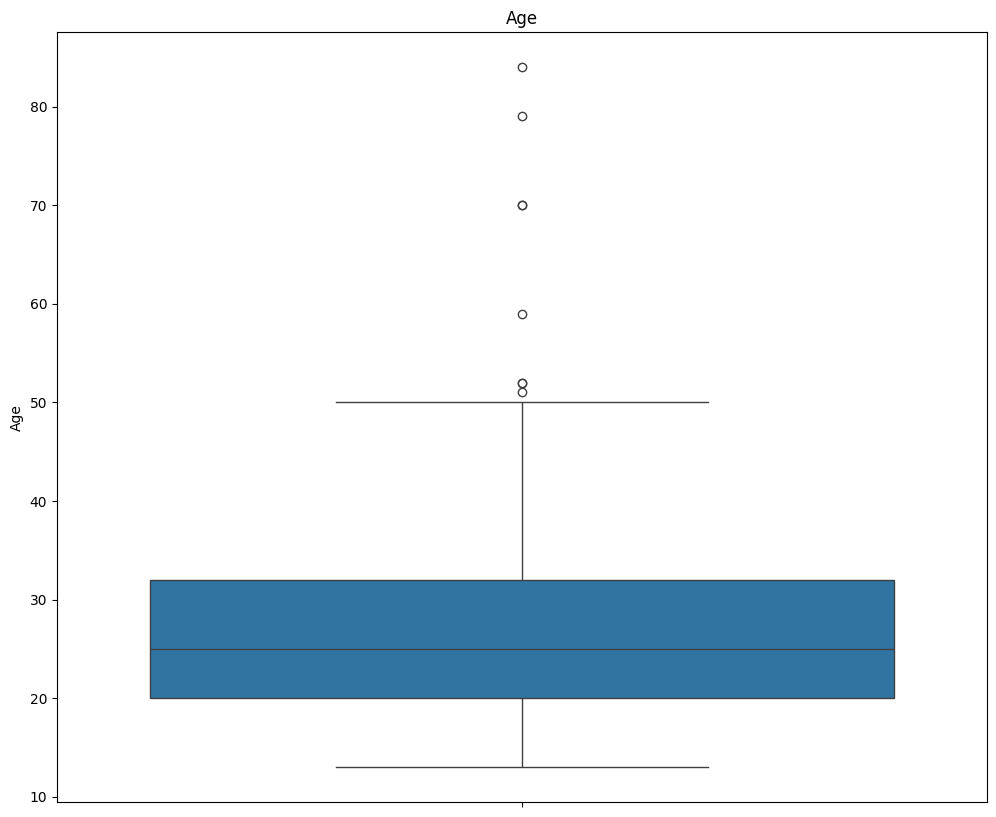

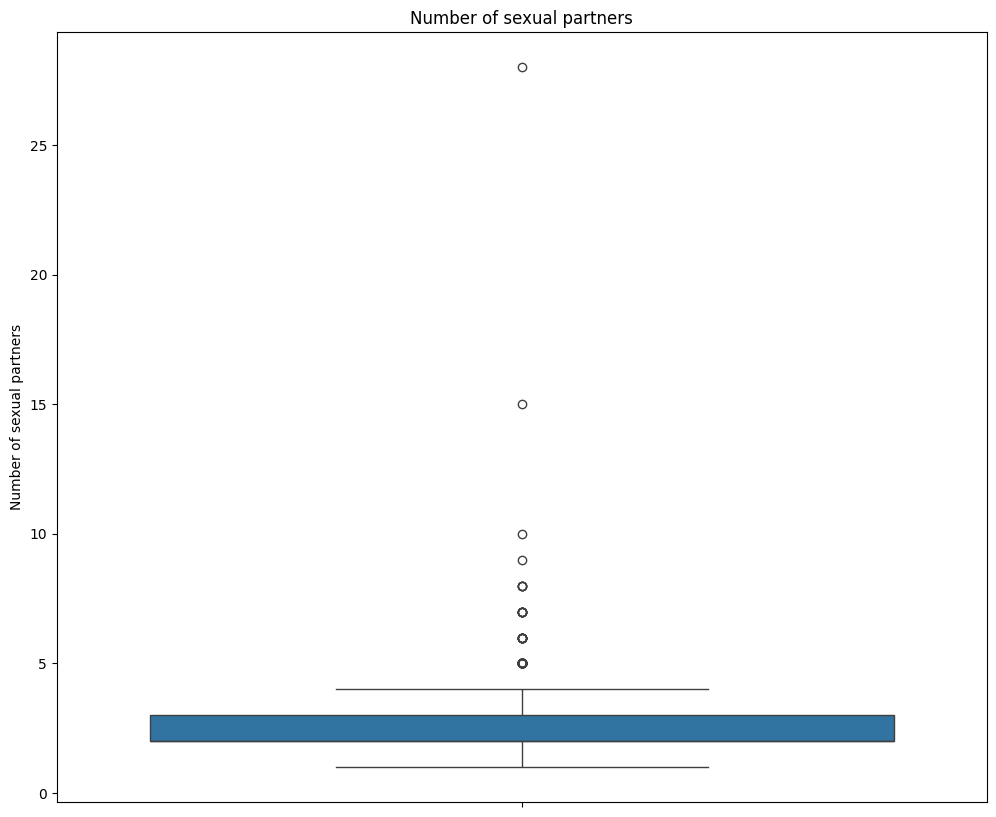

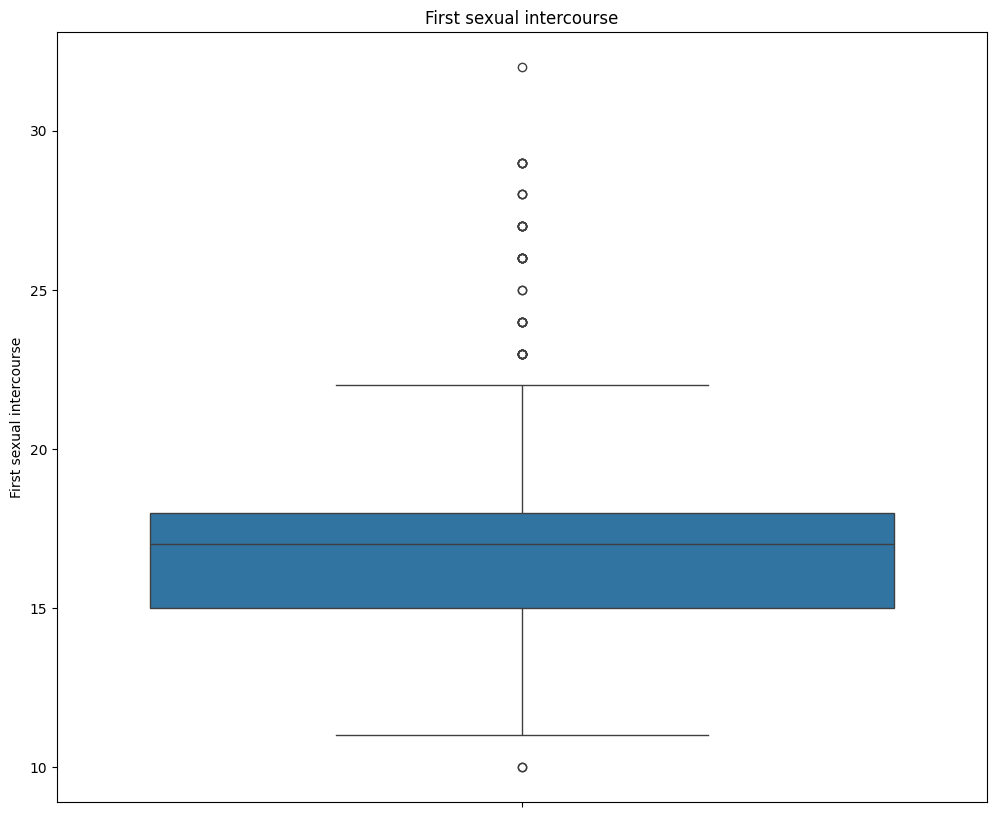

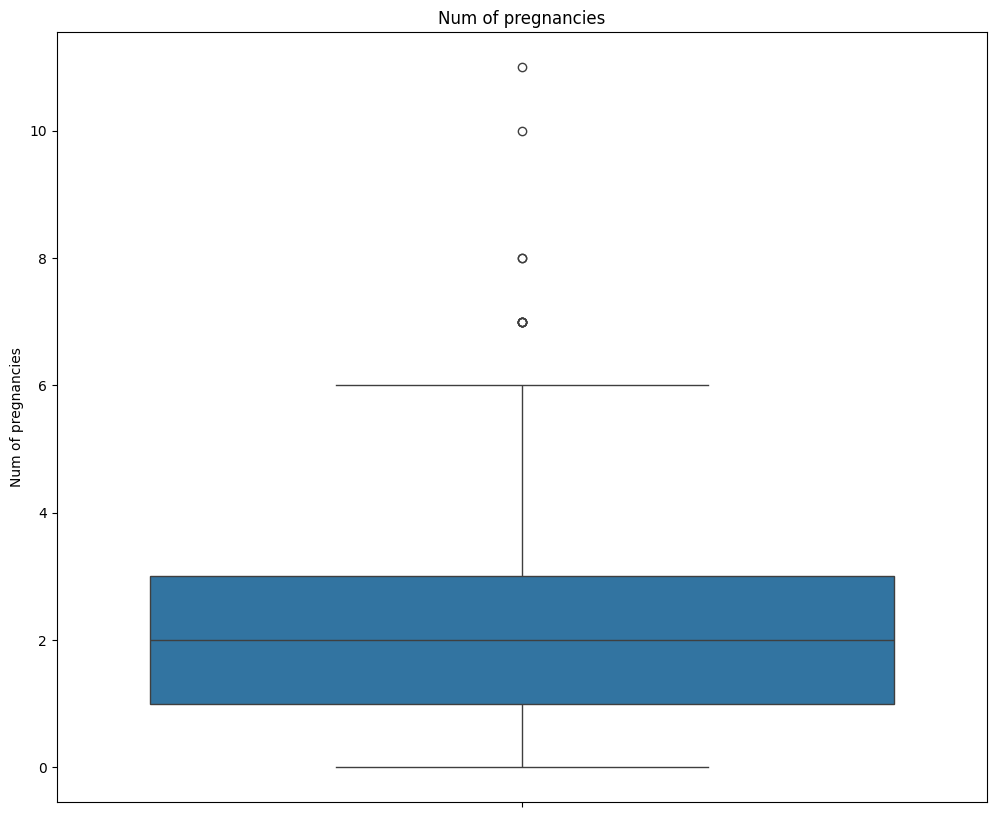

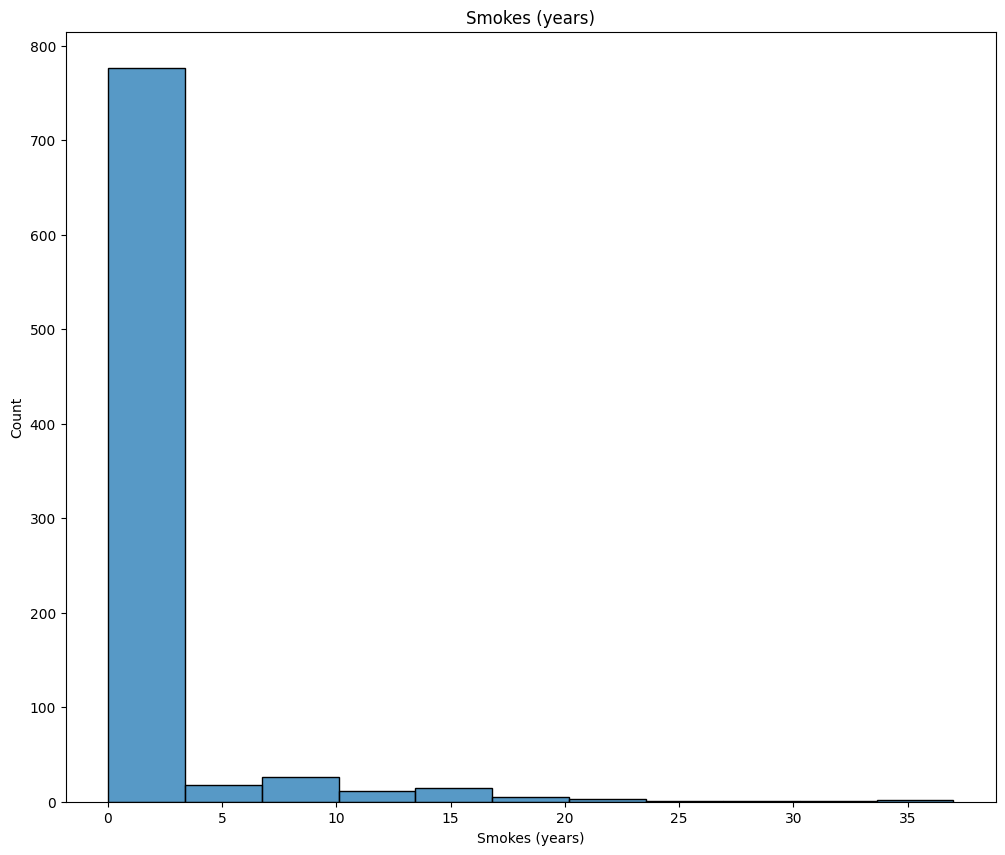

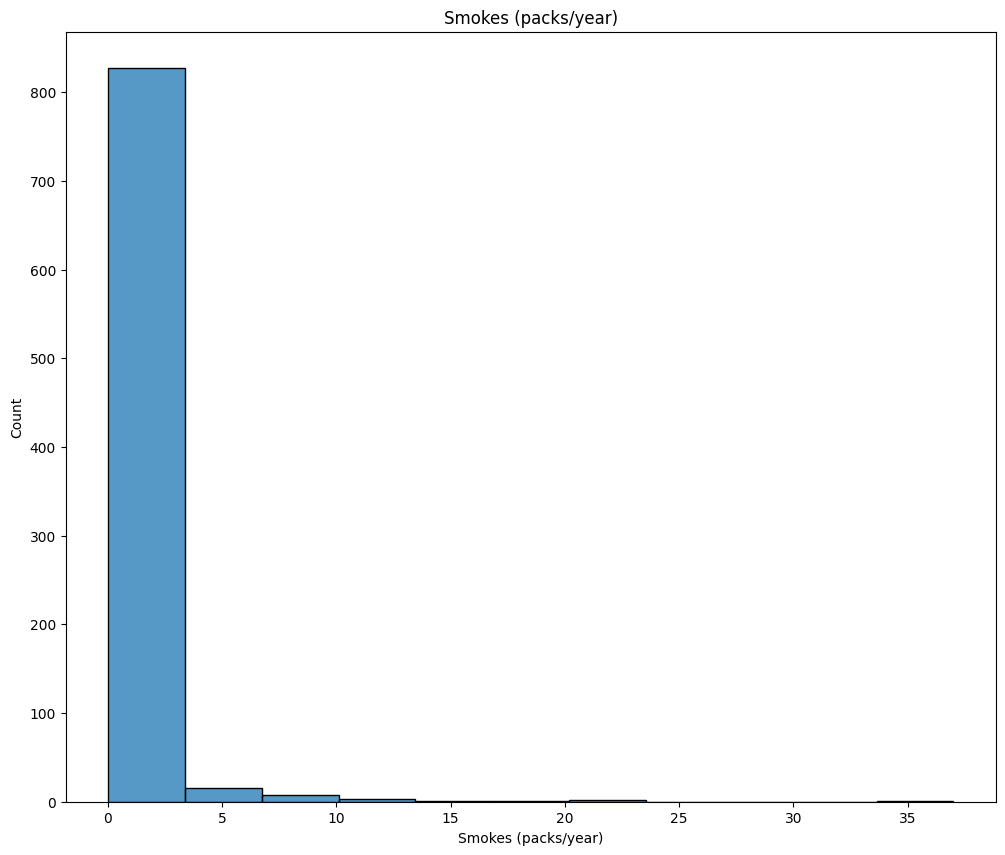

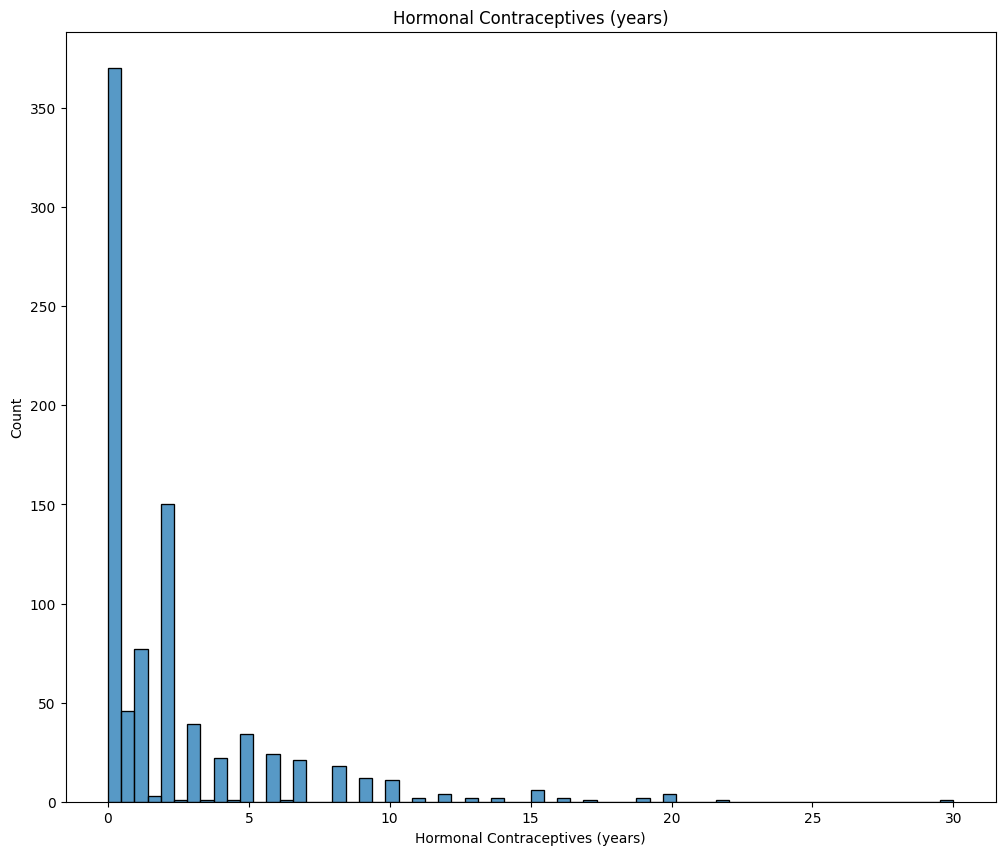

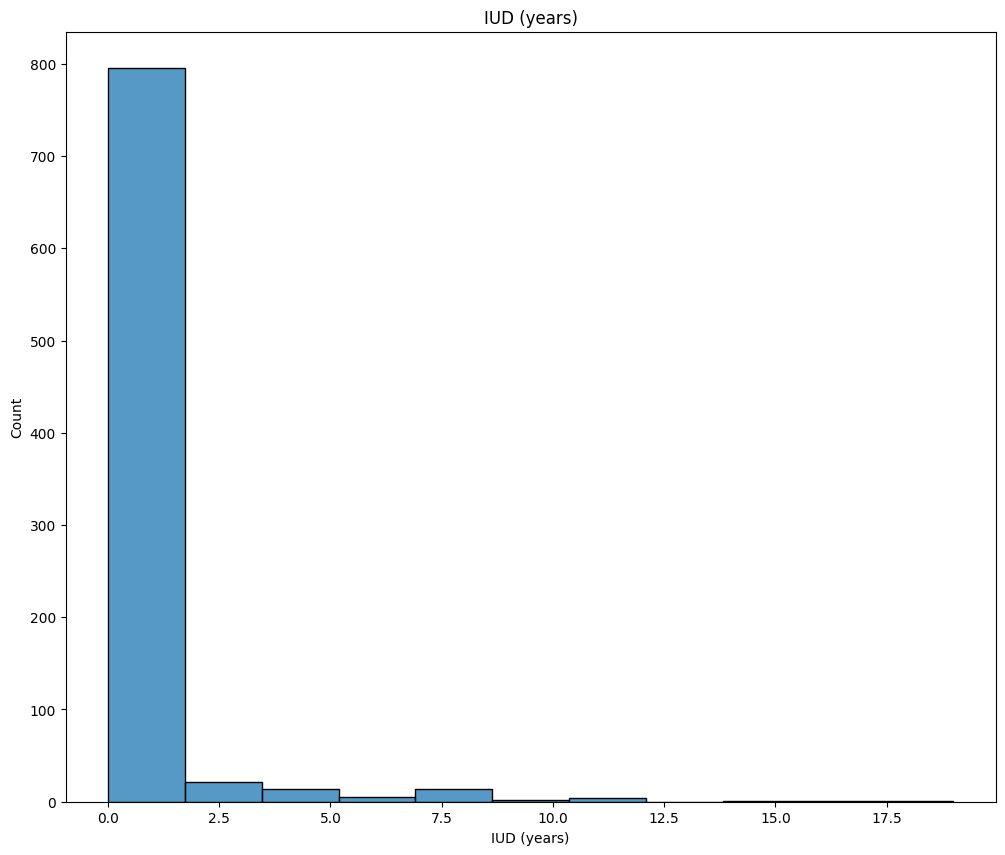

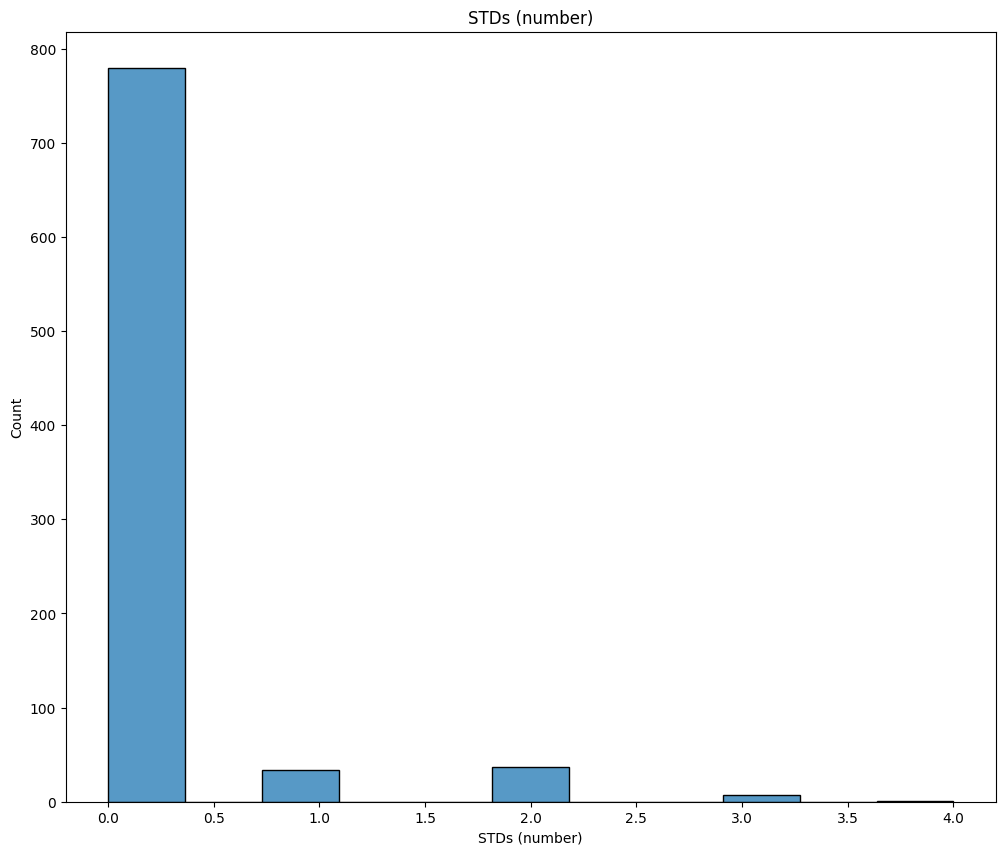

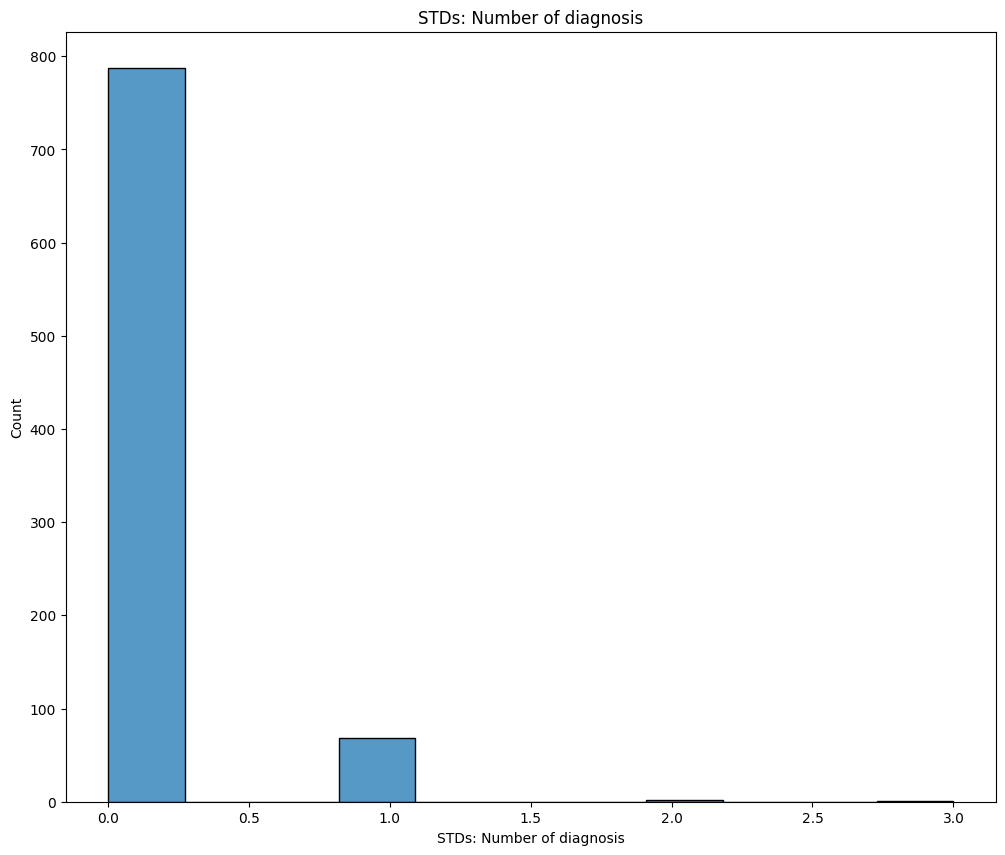

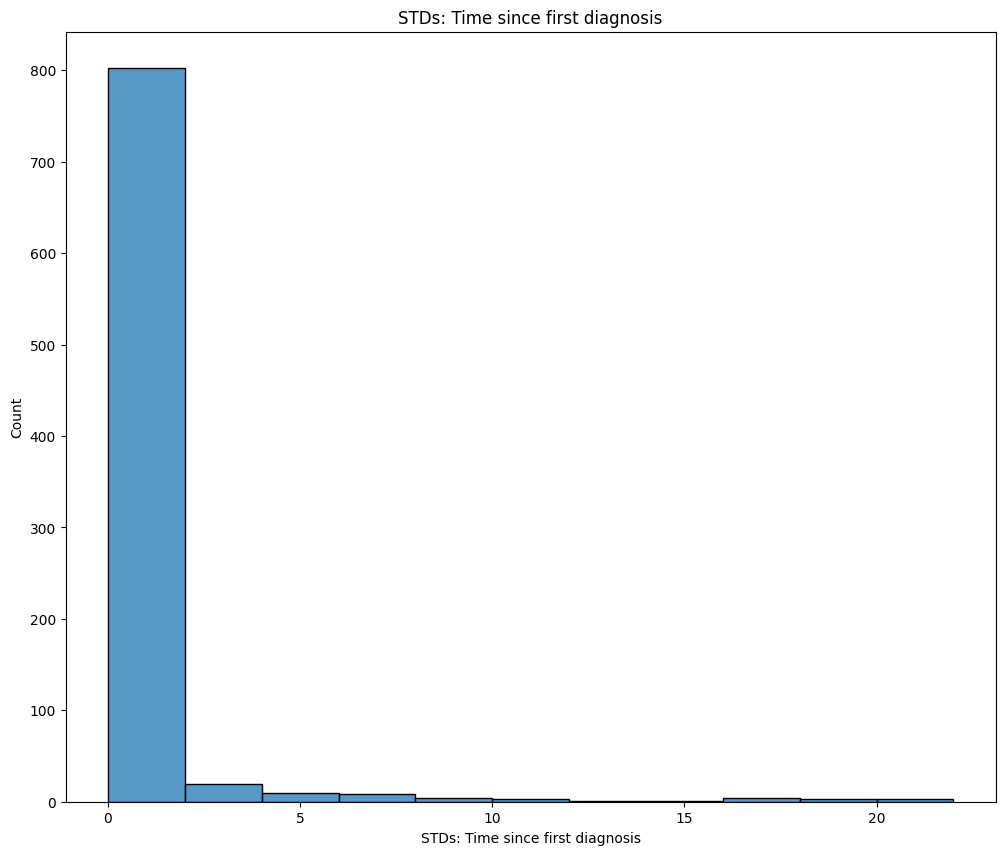

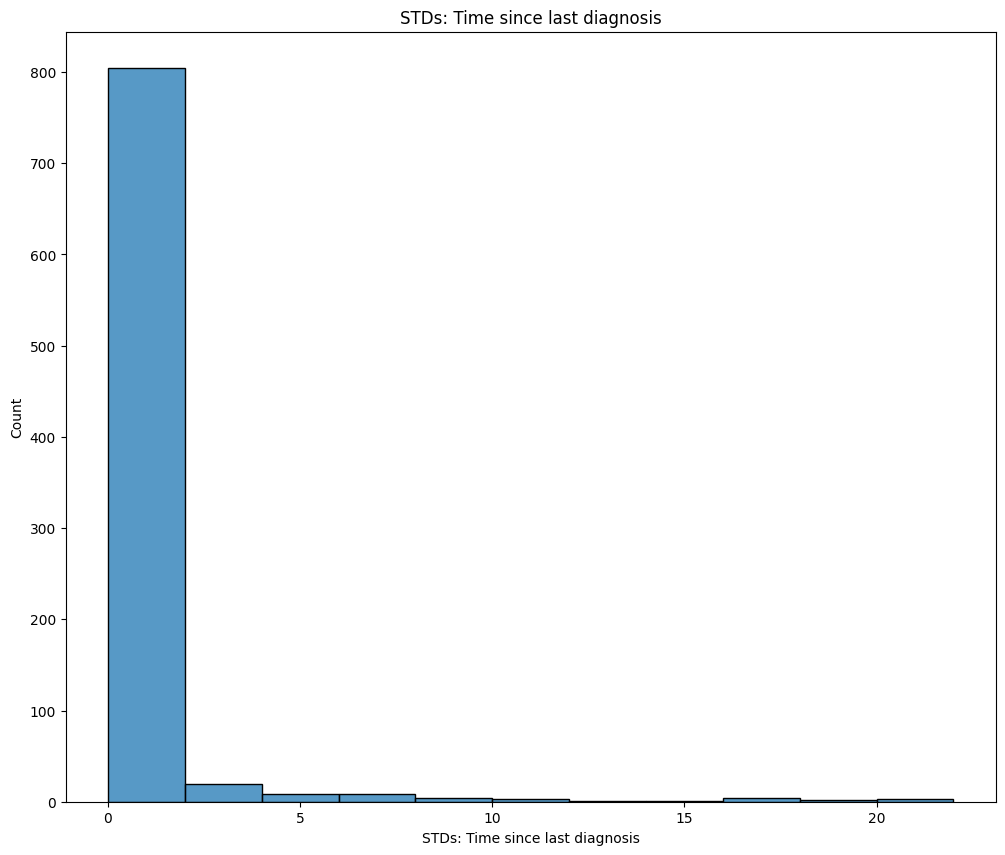

In [10]:
box_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']
for column in box_columns:
    plt.figure(figsize=(12,10))
    sb.boxplot(data=numerical[column])
    plt.title(column)
    plt.show()

hist_columns = ['Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
for column in hist_columns:
    plt.figure(figsize=(12,10))
    sb.histplot(data=numerical[column])
    plt.title(column)
    plt.show()

## Creación de matriz de correlación entre variables numéricas

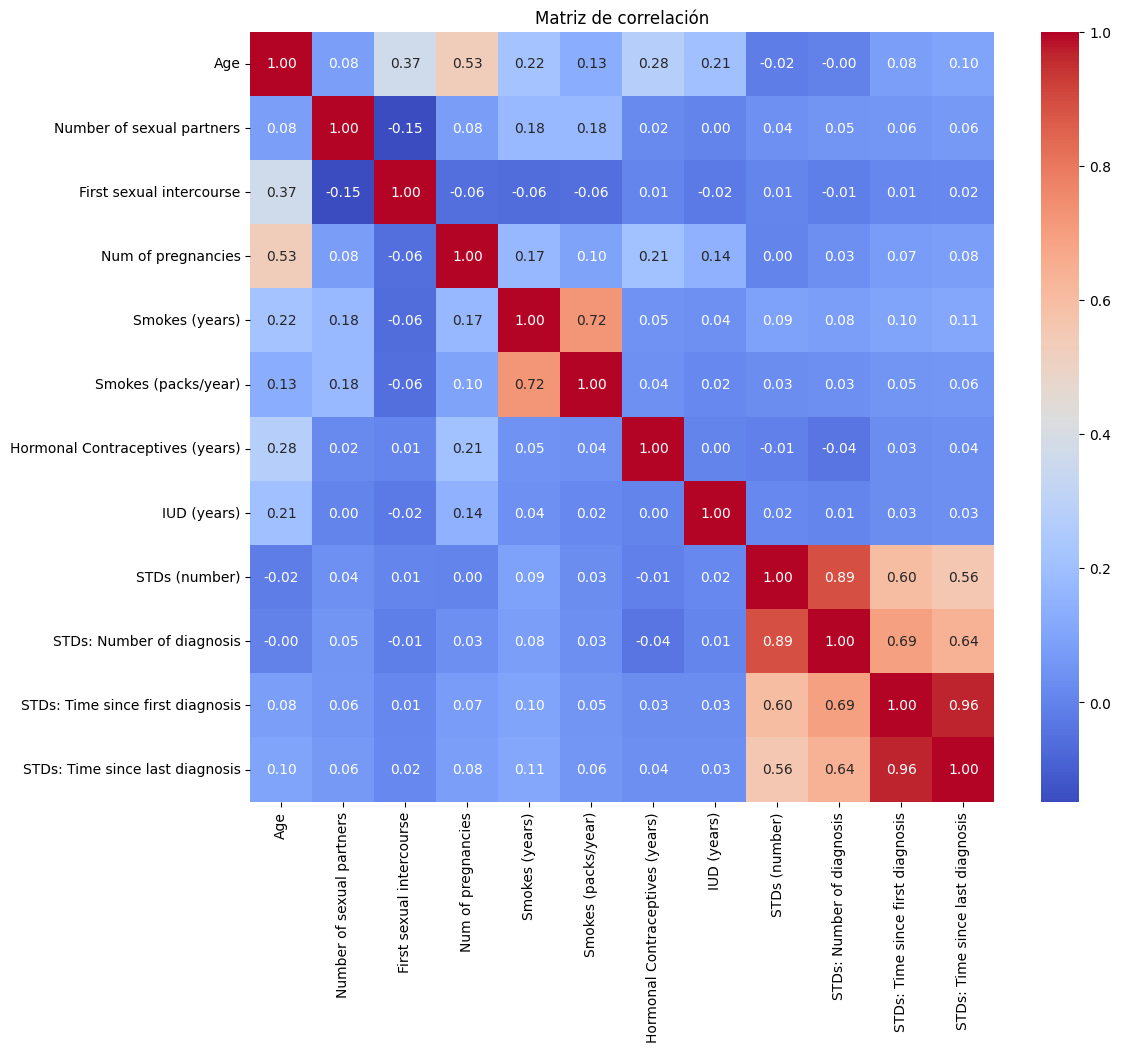

In [11]:
# Matriz de correlación
correlation_matrix = numerical.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

## Creación de las tablas de frecuencia para variables categóricas

In [12]:
import pandas as pd

def generar_tablas_frecuencia_con_estilo(data, columnas):
    styled_tables = {}
    for columna in columnas:
        frecuencia_univariada_norm = data[columna].value_counts(normalize=True).reset_index()
        frecuencia_univariada_norm.columns = [columna, 'Frequency']
        styled_table = frecuencia_univariada_norm.style.set_table_styles(
            [{
                'selector': 'th',
                'props': [
                    ('background-color', 'lightblue'),
                    ('color', 'black'),
                    ('font-family', 'verdana'),
                    ('border-style', 'solid'),
                    ('border-width', '1px'),
                    ('border-color', 'black')
                ]
            },
            {
                'selector': 'td',
                'props': [
                    ('background-color', 'lightyellow'),
                    ('color', 'black'),
                    ('font-family', 'verdana'),
                    ('border-style', 'solid'),
                    ('border-width', '1px'),
                    ('border-color', 'black')
                ]
            }]
        ).set_properties(**{
            'text-align': 'center'
        }).set_caption(f"Tabla de Frecuencia Normalizada - {columna}")

        styled_tables[columna] = styled_table
    return styled_tables

# Lista de columnas para las cuales quieres generar las tablas de frecuencia
columnas = [
    "Smokes", "Hormonal Contraceptives", "IUD", "STDs", "STDs:condylomatosis",
    "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis", "STDs:syphilis",
    "STDs:pelvic inflammatory disease", "STDs:genital herpes",
    "STDs:molluscum contagiosum", "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B",
    "STDs:HPV", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx", "Hinselmann", "Schiller",
    "Citology", "Biopsy"
]

print(len(columnas))

# Generar y almacenar las tablas de frecuencia con estilo
tablas_estilizadas = generar_tablas_frecuencia_con_estilo(data, columnas)

for fields in tablas_estilizadas:
    display(tablas_estilizadas[fields])

24


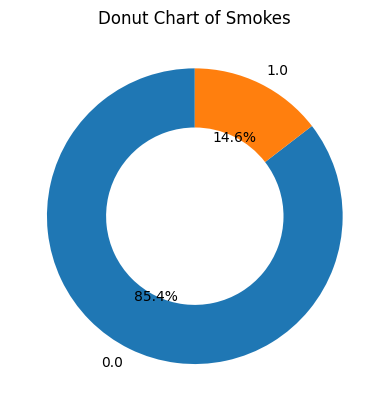

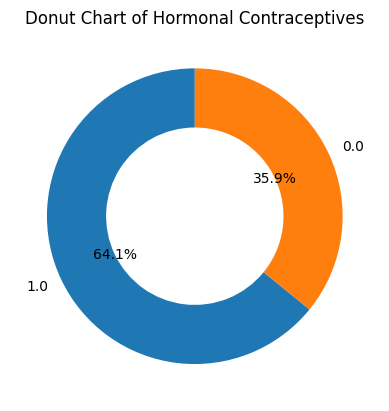

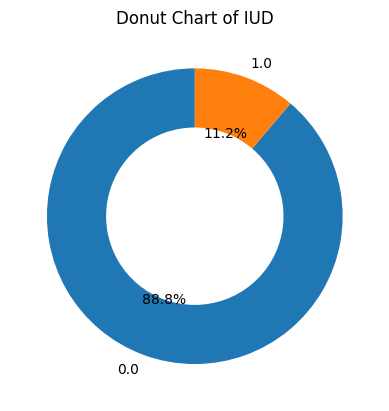

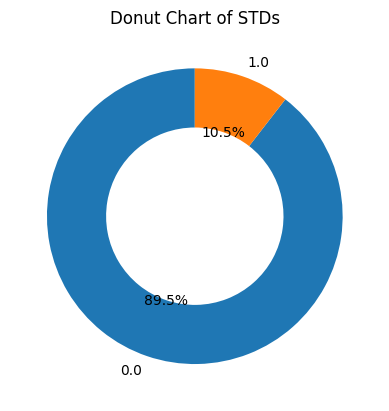

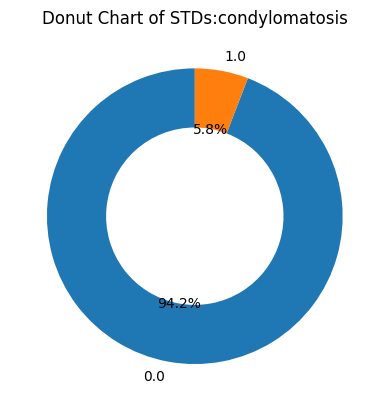

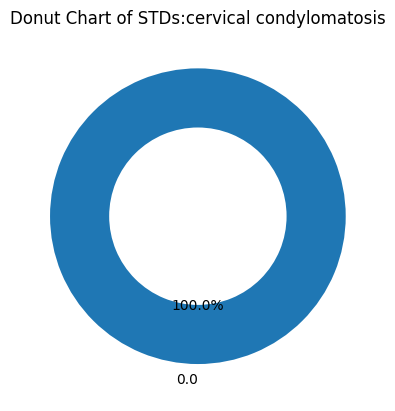

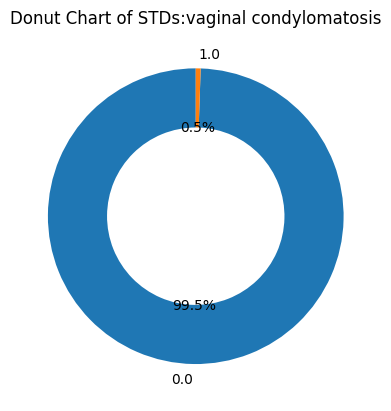

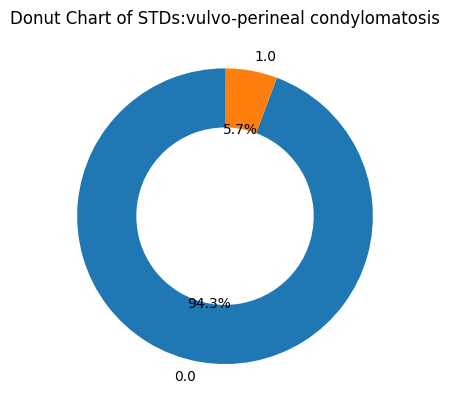

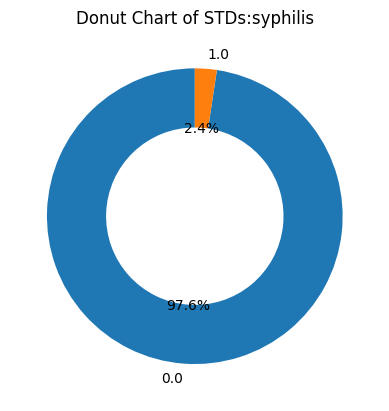

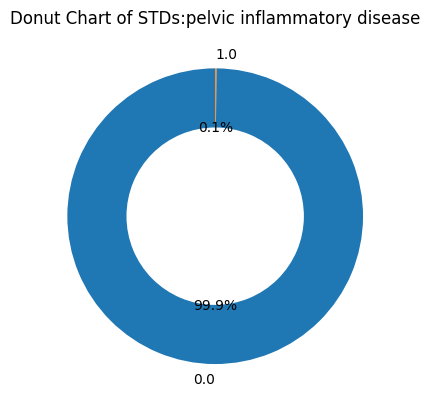

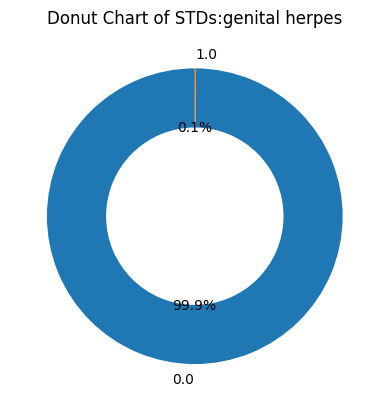

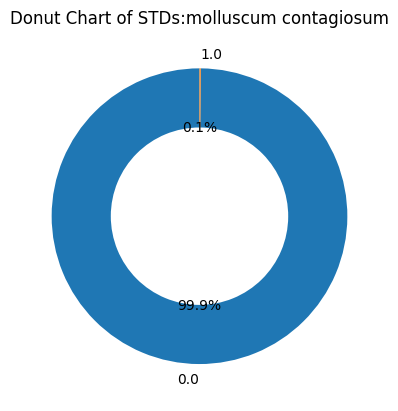

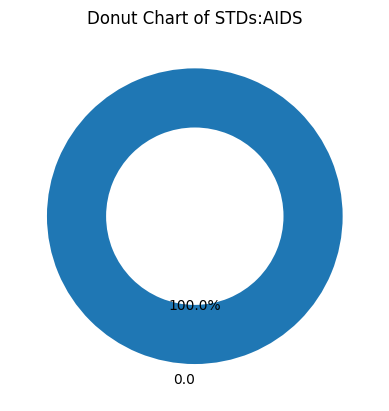

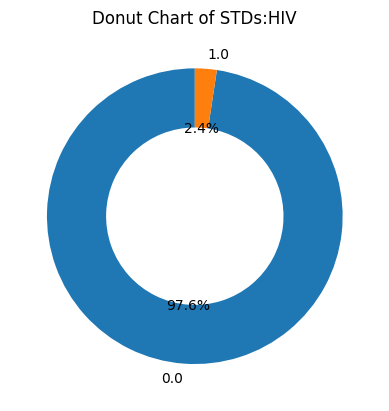

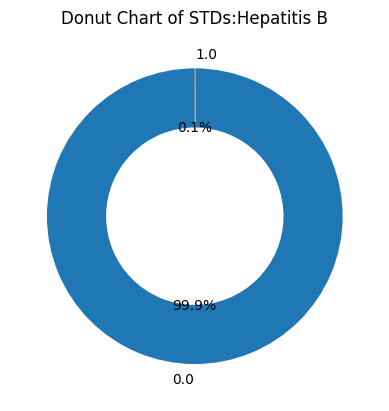

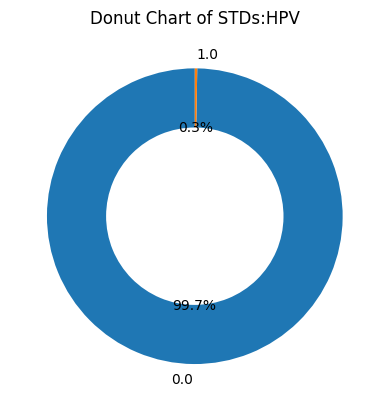

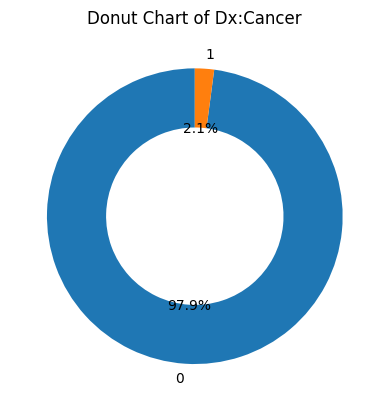

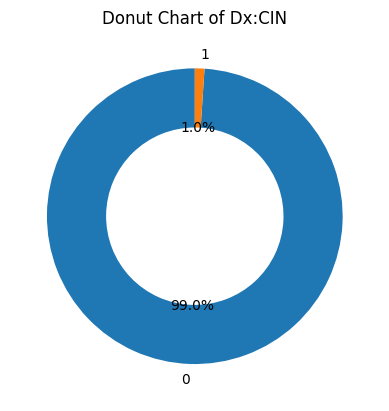

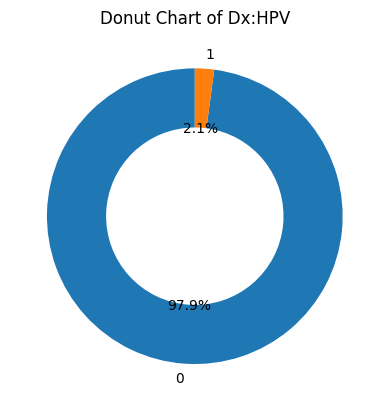

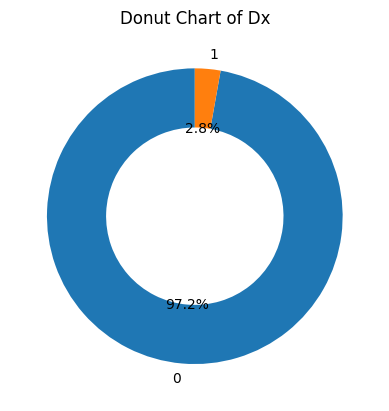

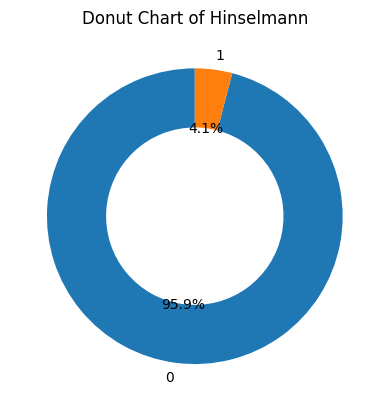

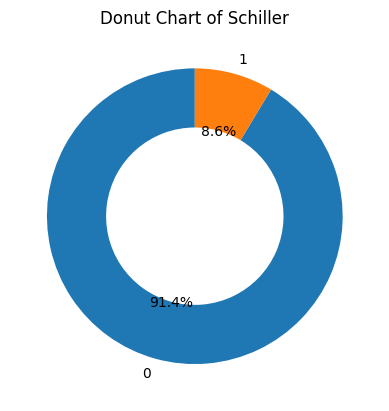

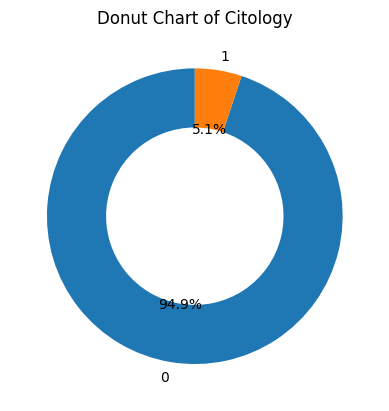

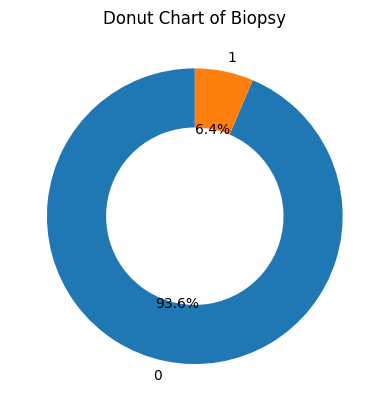

In [13]:
# Iterate over each column in the DataFrame
for column in categorical.columns:
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()
    
    # Get value counts of the column
    column_data = categorical[column].value_counts()
    
    # Plot donut chart
    ax.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    
    # Set title
    ax.set_title(f'Donut Chart of {column}')
    
    # Show plot
    plt.show()

# Lipieza de datos

In [14]:
for column in categorical:
    most_frequent = categorical[column].value_counts().argmax()
    categorical[column] = categorical[column].fillna(most_frequent)
    
numerical = numerical.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
numerical

/tmp/ipykernel_93450/1043710831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[column] = categorical[column].fillna(most_frequent)
/tmp/ipykernel_93450/1043710831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[column] = categorical[column].fillna(most_frequent)
/tmp/ipykernel_93450/1043710831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Age  Number of sexual partners  First sexual intercourse  \
0    18.0                        4.0                   15.0000   
1    15.0                        1.0                   14.0000   
2    34.0                        1.0                   16.9953   
3    52.0                        5.0                   16.0000   
4    46.0                        3.0                   21.0000   
..    ...                        ...                       ...   
853  34.0                        3.0                   18.0000   
854  32.0                        2.0                   19.0000   
855  25.0                        2.0                   17.0000   
856  33.0                        2.0                   24.0000   
857  29.0                        2.0                   20.0000   

     Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
0                   1.0             0.0                  0.0   
1                   1.0             0.0                  0.0   
2                   1.0             0.0                  0.0   
3                   4.0            37.0                 37.0   
4                   4.0             0.0                  0.0   
..                  ...             ...                  ...   
853                 0.0             0.0                  0.0   
854                 1.0             0.0                  0.0   
855                 0.0             0.0                  0.0   
856                 2.0             0.0                  0.0   
857                 1.0             0.0                  0.0   

     Hormonal Contraceptives (years)  IUD (years)  STDs (number)  \
0                               0.00          0.0            0.0   
1                               0.00          0.0            0.0   
2                               0.00          0.0            0.0   
3                               3.00          0.0            0.0   
4                              15.00          0.0            0.0   
..                               ...          ...            ...   
853                             0.00          0.0            0.0   
854                             8.00          0.0            0.0   
855                             0.08          0.0            0.0   
856                             0.08          0.0            0.0   
857                             0.50          0.0            0.0   

     STDs: Number of diagnosis  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  
..                         ...  
853                        0.0  
854                        0.0  
855                        0.0  
856                        0.0  
857                        0.0  

[858 rows x 10 columns]

In [15]:
for columna in categorical:
    frecuencia_univariada_norm = categorical[columna].value_counts(normalize=True).reset_index()
    frecuencia_univariada_norm.columns = [columna, 'Frequency']
    if frecuencia_univariada_norm['Frequency'][0] < 0.9:
        print(frecuencia_univariada_norm)


  Smokes  Frequency
0    0.0   0.841492
1    1.0   0.143357
2      0   0.015152
  Hormonal Contraceptives  Frequency
0                     1.0   0.560606
1                     0.0   0.313520
2                       0   0.125874
   IUD  Frequency
0  0.0   0.766900
1    0   0.136364
2  1.0   0.096737
  STDs  Frequency
0  0.0   0.785548
1    0   0.122378
2  1.0   0.092075
  STDs:condylomatosis  Frequency
0                 0.0   0.826340
1                   0   0.122378
2                 1.0   0.051282
  STDs:cervical condylomatosis  Frequency
0                          0.0   0.877622
1                            0   0.122378
  STDs:vaginal condylomatosis  Frequency
0                         0.0   0.872960
1                           0   0.122378
2                         1.0   0.004662
  STDs:vulvo-perineal condylomatosis  Frequency
0                                0.0   0.827506
1                                  0   0.122378
2                                1.0   0.050117
  STDs:syphili

In [16]:
for columna in categorical:
    frecuencia_univariada_norm = categorical[columna].value_counts(normalize=True).reset_index()
    frecuencia_univariada_norm.columns = [columna, 'Frequency']
    if frecuencia_univariada_norm['Frequency'][0] > 0.9:
        print(frecuencia_univariada_norm)

   Dx:Cancer  Frequency
0          0   0.979021
1          1   0.020979
   Dx:CIN  Frequency
0       0    0.98951
1       1    0.01049
   Dx:HPV  Frequency
0       0   0.979021
1       1   0.020979
   Dx  Frequency
0   0   0.972028
1   1   0.027972
   Hinselmann  Frequency
0           0   0.959207
1           1   0.040793
   Schiller  Frequency
0         0   0.913753
1         1   0.086247
   Citology  Frequency
0         0   0.948718
1         1   0.051282
   Biopsy  Frequency
0       0   0.935897
1       1   0.064103


In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [18]:
chi_cuadrado, p_value = calculate_bartlett_sphericity(numerical)
chi_cuadrado, p_value

(2767.432895257492, 0.0)

In [19]:
kmo, kmo_modelo = calculate_kmo(numerical)
kmo_modelo

0.4963051219205774

In [20]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(numerical.astype("float"))
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = numerical.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']
)

Age  Number of sexual partners  First sexual intercourse  \
PC1   0.413005                   0.218848                  0.034820   
PC2  -0.294591                   0.002052                 -0.103648   
PC3  -0.421435                   0.247778                 -0.411784   
PC4   0.092270                  -0.344775                  0.700500   
PC5   0.019568                  -0.138276                  0.044477   
PC6   0.175682                   0.829856                  0.308517   
PC7   0.091803                  -0.230116                 -0.170494   
PC8   0.642573                  -0.093756                 -0.407573   
PC9  -0.320944                   0.047928                  0.186247   
PC10  0.030683                   0.003970                 -0.027326   

      Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
PC1             0.375854        0.497693             0.445268   
PC2            -0.222785       -0.064073            -0.078698   
PC3            -0.271391        0.394557             0.459345   
PC4            -0.345415        0.229791             0.265600   
PC5            -0.038918        0.056152             0.045467   
PC6            -0.060949       -0.151179            -0.156421   
PC7             0.606145        0.010871            -0.070839   
PC8            -0.473758        0.251160            -0.317254   
PC9             0.136370        0.669945            -0.617312   
PC10            0.021242       -0.041017             0.026910   

      Hormonal Contraceptives (years)  IUD (years)  STDs (number)  \
PC1                          0.197478     0.148158       0.255011   
PC2                         -0.184354    -0.089909       0.633268   
PC3                         -0.235110    -0.179214      -0.179232   
PC4                         -0.208312    -0.309175       0.004746   
PC5                         -0.594118     0.785916      -0.028081   
PC6                         -0.344212    -0.120649      -0.033159   
PC7                         -0.583130    -0.441328      -0.038259   
PC8                         -0.106135    -0.112626      -0.002744   
PC9                          0.064662     0.048233       0.014786   
PC10                        -0.037428    -0.016062       0.705844   

      STDs: Number of diagnosis  
PC1                    0.259060  
PC2                    0.632012  
PC3                   -0.177728  
PC4                   -0.015885  
PC5                   -0.018861  
PC6                   -0.010842  
PC7                    0.026983  
PC8                    0.007704  
PC9                   -0.069179  
PC10                  -0.703962

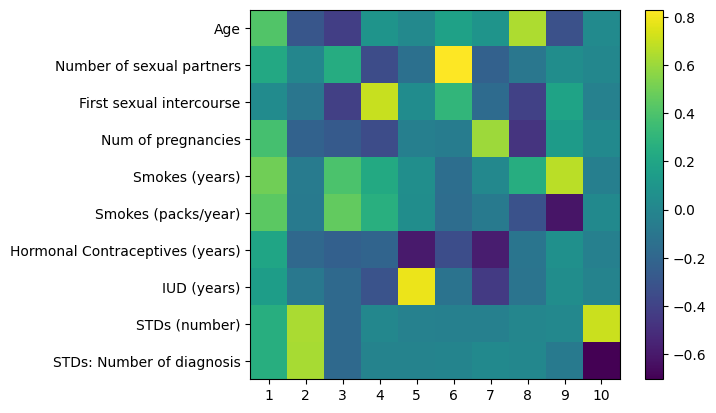

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(numerical.columns)), numerical.columns)
plt.xticks(range(len(numerical.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar()

Text(0, 0.5, 'Por. varianza explicada')

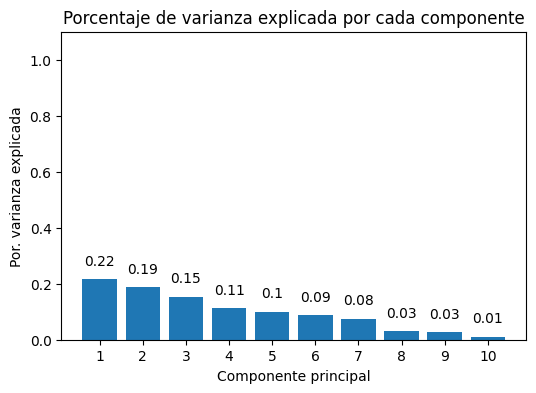

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(numerical.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

Text(0, 0.5, 'Por. varianza acumulada')

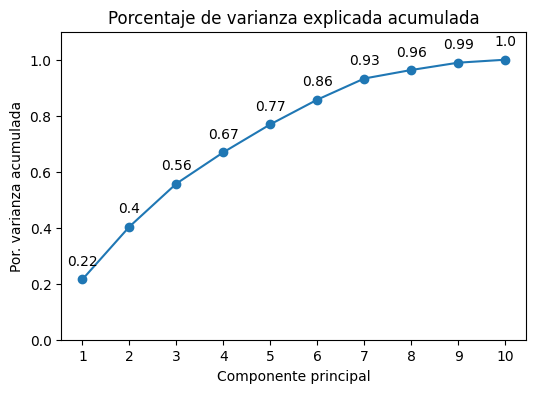

In [23]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(numerical.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(numerical.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

In [24]:
from apyori import apriori

In [25]:
# clean_data = numerical
clean_data = pd.concat([numerical, categorical], axis=1, join='inner')
# Eliminar columnas
clean_data = clean_data.drop(columns=["STDs:AIDS"], axis=1) # Solo contiene un valor
clean_data = clean_data.drop(columns=["Dx"], axis=1)
clean_data = clean_data.drop(columns=["STDs:condylomatosis"], axis=1)
clean_data = clean_data.drop(columns=["STDs:vaginal condylomatosis"], axis=1) # Contienen frecuencias muy altas
clean_data = clean_data.drop(columns=["STDs:cervical condylomatosis"], axis=1)
clean_data = clean_data.drop(columns=["STDs:vulvo-perineal condylomatosis"], axis=1)
clean_data = clean_data.drop(columns=["STDs:pelvic inflammatory disease"], axis=1)
clean_data = clean_data.drop(columns=["STDs:genital herpes"], axis=1)
clean_data = clean_data.drop(columns=["STDs:molluscum contagiosum"], axis=1)
clean_data = clean_data.drop(columns=["STDs:Hepatitis B"], axis=1)
clean_data = clean_data.drop(columns=["STDs:HPV"], axis=1)
clean_data = clean_data.drop(columns=["STDs:syphilis"], axis=1)
clean_data = clean_data.drop(columns=["STDs:HIV"], axis=1)
clean_data = clean_data.drop(columns=["Dx:Cancer"], axis=1)
clean_data = clean_data.drop(columns=["Dx:CIN"], axis=1)
clean_data = clean_data.drop(columns=["Dx:HPV"], axis=1)
# Convertir las variables numericas a categoricas
clean_data['Age'] = pd.cut(clean_data['Age'], bins=[0.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0], labels=['Age: 0-20', 'Age: 21-30', 'Age: 31-40', 'Age: 41-50', 'Age: 51-60', 'Age: 61-70', 'Age: 71-80', 'Age: 81-90', 'Age: 91-100'])
clean_data['Number of sexual partners'] = pd.cut(clean_data['Number of sexual partners'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['Number of sexual partners: 0-1', 'Number of sexual partners: 2', 'Number of sexual partners: 3', 'Number of sexual partners: 4', 'Number of sexual partners: 5', 'Number of sexual partners: 6', 'Number of sexual partners: 7', 'Number of sexual partners: 8', 'Number of sexual partners: 9', 'Number of sexual partners: 10'])
clean_data['First sexual intercourse'] = pd.cut(clean_data['First sexual intercourse'], bins=[-1.0, 10.0, 20.0, 30.0, 40.0, 50.0], labels=['First sexual intercourse: 0-10', 'First sexual intercourse: 11-20', 'First sexual intercourse: 21-30', 'First sexual intercourse: 31-40', 'First sexual intercourse: 41-50'])
clean_data['Num of pregnancies'] = pd.cut(clean_data['Num of pregnancies'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['Num of pregnancies: 0-1', 'Num of pregnancies: 2', 'Num of pregnancies: 3', 'Num of pregnancies: 4', 'Num of pregnancies: 5', 'Num of pregnancies: 6', 'Num of pregnancies: 7', 'Num of pregnancies: 8', 'Num of pregnancies: 9', 'Num of pregnancies: 10'])
clean_data['Smokes (years)'] = pd.cut(clean_data['Smokes (years)'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['Smokes (years): 0-1', 'Smokes (years): 2', 'Smokes (years): 3', 'Smokes (years): 4', 'Smokes (years): 5', 'Smokes (years): 6', 'Smokes (years): 7', 'Smokes (years): 8', 'Smokes (years): 9', 'Smokes (years): 10'])
clean_data['Smokes (packs/year)'] = pd.cut(clean_data['Smokes (packs/year)'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['Smokes (packs/year): 0-1', 'Smokes (packs/year): 2', 'Smokes (packs/year): 3', 'Smokes (packs/year): 4', 'Smokes (packs/year): 5', 'Smokes (packs/year): 6', 'Smokes (packs/year): 7', 'Smokes (packs/year): 8', 'Smokes (packs/year): 9', 'Smokes (packs/year): 10'])
clean_data['Hormonal Contraceptives (years)'] = pd.cut(clean_data['Hormonal Contraceptives (years)'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['Hormonal Contraceptives (years): 0-1', 'Hormonal Contraceptives (years): 2', 'Hormonal Contraceptives (years): 3', 'Hormonal Contraceptives (years): 4', 'Hormonal Contraceptives (years): 5', 'Hormonal Contraceptives (years): 6', 'Hormonal Contraceptives (years): 7', 'Hormonal Contraceptives (years): 8', 'Hormonal Contraceptives (years): 9', 'Hormonal Contraceptives (years): 10'])
clean_data['IUD (years)'] = pd.cut(clean_data['IUD (years)'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['IUD (years): 0-1', 'IUD (years): 2', 'IUD (years): 3', 'IUD (years): 4', 'IUD (years): 5', 'IUD (years): 6', 'IUD (years): 7', 'IUD (years): 8', 'IUD (years): 9', 'IUD (years): 10'])
clean_data['STDs (number)'] = pd.cut(clean_data['STDs (number)'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['STDs (number): 0-1', 'STDs (number): 2', 'STDs (number): 3', 'STDs (number): 4', 'STDs (number): 5', 'STDs (number): 6', 'STDs (number): 7', 'STDs (number): 8', 'STDs (number): 9', 'STDs (number): 10'])
clean_data['STDs: Number of diagnosis'] = pd.cut(clean_data['STDs: Number of diagnosis'], bins=[-1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], labels=['STDs: Number of diagnosis: 0-1', 'STDs: Number of diagnosis: 2', 'STDs: Number of diagnosis: 3', 'STDs: Number of diagnosis: 4', 'STDs: Number of diagnosis: 5', 'STDs: Number of diagnosis: 6', 'STDs: Number of diagnosis: 7', 'STDs: Number of diagnosis: 8', 'STDs: Number of diagnosis: 9', 'STDs: Number of diagnosis: 10'])
# Convertir los valores de las categoricas a una etiquetas explicitas
clean_data["Smokes"] = clean_data["Smokes"].map({"0.0": "Smokes: No", "1.0": "Smokes: Yes"})
clean_data["Hormonal Contraceptives"] = clean_data["Hormonal Contraceptives"].map({"0.0": "Hormonal Contraceptives: No", "1.0": "Hormonal Contraceptives: Yes"})
clean_data["IUD"] = clean_data["IUD"].map({"0.0" : "IUD: No", "1.0": "IUD: Yes"})
clean_data["STDs"] = clean_data["STDs"].map({"0.0": "STDs: No", "1.0": "STDs: Yes"})
clean_data["Hinselmann"] = clean_data["Hinselmann"].map({0: "Hinselmann: No", 1: "Hinselmann: Yes"})
clean_data["Schiller"] = clean_data["Schiller"].map({0: "Schiller: No", 1: "Schiller: Yes"})
clean_data["Citology"] = clean_data["Citology"].map({0: "Citology: No", 1: "Citology: Yes"})
clean_data["Biopsy"] = clean_data["Biopsy"].map({0: "Biopsy: No", 1: "Biopsy: Yes"})

# Se van a convertir los datos a una lista de listas
records = []

for i in range(0, 858):
    records.append([str(clean_data.values[i,j]) for j in range(0, 18)]) 
records

[['Age: 0-20',
  'Number of sexual partners: 4',
  'First sexual intercourse: 11-20',
  'Num of pregnancies: 0-1',
  'Smokes (years): 0-1',
  'Smokes (packs/year): 0-1',
  'Hormonal Contraceptives (years): 0-1',
  'IUD (years): 0-1',
  'STDs (number): 0-1',
  'STDs: Number of diagnosis: 0-1',
  'Smokes: No',
  'Hormonal Contraceptives: No',
  'IUD: No',
  'STDs: No',
  'Hinselmann: No',
  'Schiller: No',
  'Citology: No',
  'Biopsy: No'],
 ['Age: 0-20',
  'Number of sexual partners: 0-1',
  'First sexual intercourse: 11-20',
  'Num of pregnancies: 0-1',
  'Smokes (years): 0-1',
  'Smokes (packs/year): 0-1',
  'Hormonal Contraceptives (years): 0-1',
  'IUD (years): 0-1',
  'STDs (number): 0-1',
  'STDs: Number of diagnosis: 0-1',
  'Smokes: No',
  'Hormonal Contraceptives: No',
  'IUD: No',
  'STDs: No',
  'Hinselmann: No',
  'Schiller: No',
  'Citology: No',
  'Biopsy: No'],
 ['Age: 31-40',
  'Number of sexual partners: 0-1',
  'First sexual intercourse: 11-20',
  'Num of pregnancies: 

In [26]:
clean_data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'Smokes', 'Hormonal Contraceptives', 'IUD',
       'STDs', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [27]:
reglas_asociacion = apriori(records, min_support=0.1, min_confidence = 0.95)
reglas = list(reglas_asociacion)

In [32]:
len(reglas)

232121

In [29]:
list(reglas)

[RelationRecord(items=frozenset({'Hinselmann: No'}), support=0.9592074592074592, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Hinselmann: No'}), confidence=0.9592074592074592, lift=1.0)]),
 RelationRecord(items=frozenset({'STDs: Number of diagnosis: 0-1'}), support=0.9965034965034965, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'STDs: Number of diagnosis: 0-1'}), confidence=0.9965034965034965, lift=1.0)]),
 RelationRecord(items=frozenset({'Biopsy: No', 'Age: 0-20'}), support=0.2494172494172494, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Age: 0-20'}), items_add=frozenset({'Biopsy: No'}), confidence=0.9553571428571429, lift=1.0207925636007829)]),
 RelationRecord(items=frozenset({'First sexual intercourse: 11-20', 'Age: 0-20'}), support=0.25990675990675993, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Age: 0-20'}), items_add=frozenset({'First sexual intercourse: 11-20'}), confidence

In [33]:
# Filtrar reglas que contengan un diagnostico de cancer positivo
filtered_rules = [rule for rule in reglas if 'STDs: Yes' in rule[0]]
filtered_rules

[]

In [31]:
output = list(reglas)
def inspect(output):
    lhs         = [tuple(result[2][0][0])[0] if tuple(result[2][0][0]) != () else "No LHS" for result in output]
    rhs         = [tuple(result[2][0][1])[0] for result in output]
    support    = [result[1] for result in output]
    confidence = [result[2][0][2] for result in output]
    lift       = [result[2][0][3] for result in output]
    return list(zip(lhs, rhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(output), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
output_DataFrame

Left_Hand_Side                  Right_Hand_Side  \
0                             No LHS                   Hinselmann: No   
1                             No LHS   STDs: Number of diagnosis: 0-1   
2                          Age: 0-20                       Biopsy: No   
3                          Age: 0-20  First sexual intercourse: 11-20   
4                          Age: 0-20                   Hinselmann: No   
...                              ...                              ...   
232116                Hinselmann: No   STDs: Number of diagnosis: 0-1   
232117                    Smokes: No                   Hinselmann: No   
232118  Number of sexual partners: 2                   Hinselmann: No   
232119  Number of sexual partners: 2                   Hinselmann: No   
232120                    Smokes: No                   Hinselmann: No   

         Support  Confidence      Lift  
0       0.959207    0.959207  1.000000  
1       0.996503    0.996503  1.000000  
2       0.249417    0.955357  1.020793  
3       0.259907    0.995536  1.083972  
4       0.251748    0.964286  1.005294  
...          ...         ...       ...  
232116  0.153846    0.956522  1.391010  
232117  0.152681    0.963235  1.643053  
232118  0.106061    0.957895  1.365239  
232119  0.108392    0.958763  1.384880  
232120  0.102564    0.956522  2.464552  

[232121 rows x 5 columns]